<a href="https://colab.research.google.com/github/Imago16/up-grade-inflation/blob/main/Grade_Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grade Inflation in UP Diliman

Concerns about the quality of education and the grading system of the University of the Philippines as it exits the pandemic have been publicly raised for quite some time. Through obtained data from the Academic Information System Section of UP Diliman-Office of the Registrar, the *Collegian* analyzed grade records since the First Semester of AY 2022-2023 up to the First Semester of AY 2023-2024 to analyze the phenomenon of grade inflation in the University.



# Initializing Import Libraries & Plots

The code below uses pandas, matplotlib, and seaborn for the plots. It also groups the raw data based on offering college, academic cluster, semester, and academic year.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Initial Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


# Style Definitions

style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot')
palette = ["#1984c5", "#22a7f0", "#40b3f0", "#63bff0", "#a7d5ed", "#b4bfd6", "#bba4c6", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

# Read CSV & Variable Definitions

data = pd.read_csv('/content/drive/MyDrive/400 Organizations/401 Philippine Collegian/Grade Inflation Legwork/Request of Collegian Grades 2022-2023.csv')
offering_college = data['offering_college'].unique()
data['grade'] = pd.to_numeric(data['grade'], errors='coerce')

# Define Academic Cluster & Cleaning DataFrame

acadcluster_dict = {
    'CAL': 'Arts & Letters', 'CFA': 'Arts & Letters', 'CHK': 'Arts & Letters', 'CMC': 'Arts & Letters', 'CMU': 'Arts & Letters',
    'AIT': 'Management & Economics', 'VSB': 'Management & Economics', 'SE': 'Management & Economics', 'SLIS': 'Management & Economics',
    'NCPAG': 'Management & Economics', 'SURP': 'Management & Economics', 'TMC': 'Management & Economics', 'UPDEPO': 'Management & Economics',
    'UPDEPP': 'Management & Economics', 'Arch': 'Science & Technology', 'UPSA': 'Science & Technology', 'Engg': 'Science & Technology',
    'CHE': 'Science & Technology', 'CS': 'Science & Technology', 'Stat': 'Science & Technology', 'AC': 'Social Sciences & Law',
    'Educ': 'Social Sciences & Law', 'IIS': 'Social Sciences & Law', 'Law': 'Social Sciences & Law', 'CSSP': 'Social Sciences & Law',
    'CSCWD': 'Social Sciences & Law'
}
acadcluster_list = ['Arts & Letters', 'Management & Economics', 'Science & Technology', 'Social Sciences & Law']
data['acadcluster'] = data['offering_college'].map(acadcluster_dict)

data['semester'] = data['acadyear'].astype(str) + " " + data['semester'] # Combining semester & acad year
data.drop('acadyear', axis = 1, inplace = True)
sem_list = ['2022 First Semester', '2022 Second Semester', '2023 First Semester']



<ipython-input-1-c7b45f12e2b2>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster') # sets the size of the charts


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/400 Organizations/401 Philippine Collegian/Grade Inflation Legwork/Request of Collegian Grades 2022-2023.csv'

# Summary

## The Frequency of Unos Per Academic Cluster

A clear downward trend is seen for the S&T and Management & Economics clusters, which may indicate that subjects have gotten harder since the pandemic. The same trend is not seen in the other clusters, however.

acadcluster
Arts & Letters            0.282421
Management & Economics    0.253554
Science & Technology      0.229695
Social Sciences & Law     0.202344
dtype: float64
acadcluster
Arts & Letters            0.279186
Management & Economics    0.240330
Science & Technology      0.206802
Social Sciences & Law     0.206873
dtype: float64
acadcluster
Arts & Letters            0.278744
Management & Economics    0.221658
Science & Technology      0.181357
Social Sciences & Law     0.199204
dtype: float64


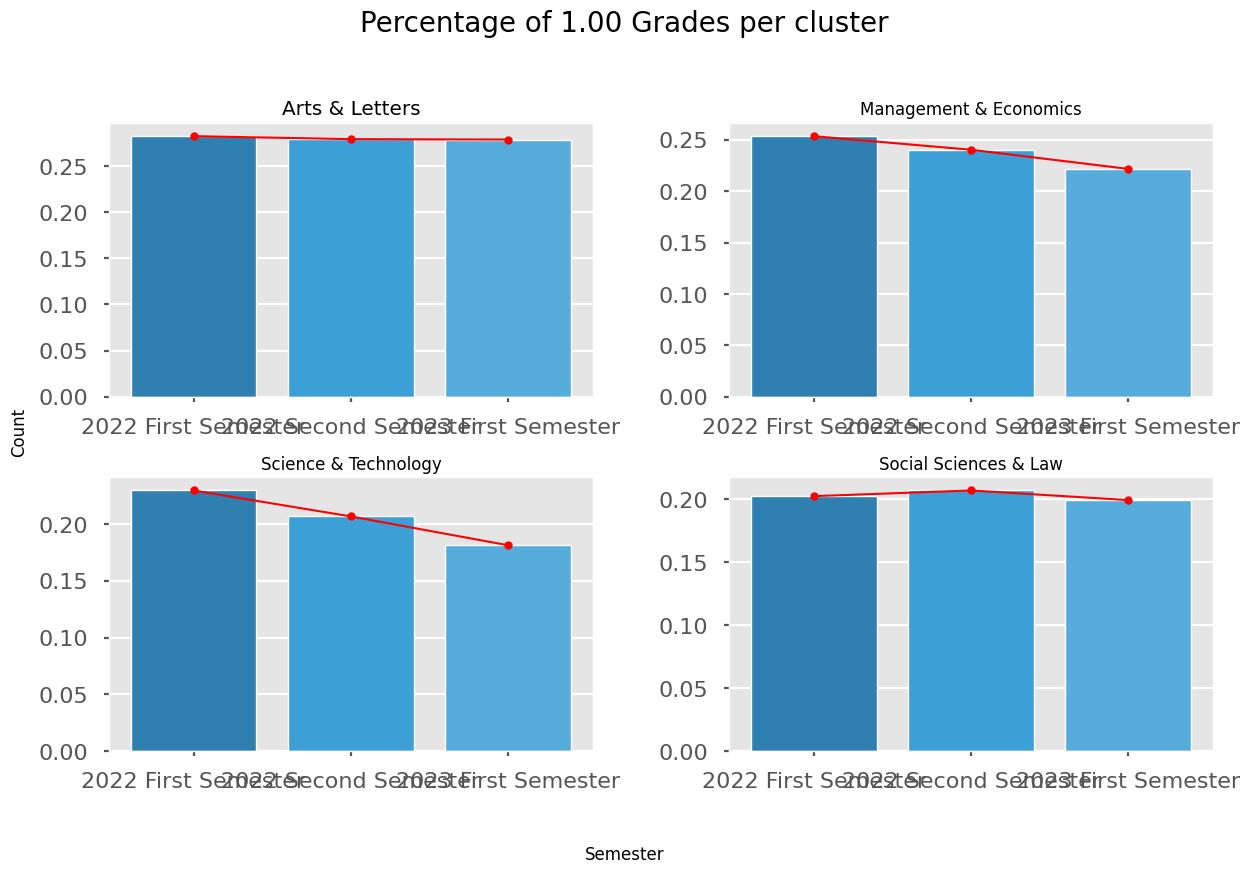

In [ ]:
uno_counts = {}
total_counts = {}
percentages = {}

# Group Grades By Semester & Acad Year
for sem in sem_list:
  uno_data = data[(data['semester'] == sem) & (data['grade'] == 1.00)]
  total_data = data[(data['semester'] == sem)]
  uno_counts[sem] = uno_data.groupby('acadcluster').size()
  total_counts[sem] = total_data.groupby('acadcluster').size()

for sem in sem_list:
  percentages[sem] = uno_counts[sem] / total_counts[sem]
  print(percentages[sem])

uno_df = pd.DataFrame(percentages).transpose()

fig, axs = plt.subplots(2, 2) # Creates Figure
fig.suptitle(f'Percentage of 1.00 Grades per cluster', fontsize = 20)
fig.supxlabel('Semester')
fig.supylabel('Count')

for i, cluster in enumerate(acadcluster_list):
  row = i // 2
  col = i % 2
  ax = axs[row, col]
  ax.set_title(f'{cluster}')
  sns.set()
  sns.barplot(x=uno_df.index, y=uno_df[cluster], ax=ax, palette=palette)
  ax.plot(uno_df.index, uno_df[cluster], color='red', marker='o')
  ax.yaxis.label.set_visible(False)
  ax.xaxis.label.set_visible(False)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout with padding
plt.show()


## Empirical Cumulative Distribution Function

Below is the histogram of all grades across all colleges, divided per semester. This histogram is the basis for the ECDF probability distribution that is used later.

Reference Used: https://machinelearningmastery.com/empirical-distribution-function-in-python/


grade
1.00    27996
1.25    21500
1.50    16518
1.75    11331
2.00     7483
2.25     5188
2.50     3805
2.75     2730
3.00     2714
4.00      845
5.00     3675
dtype: int64


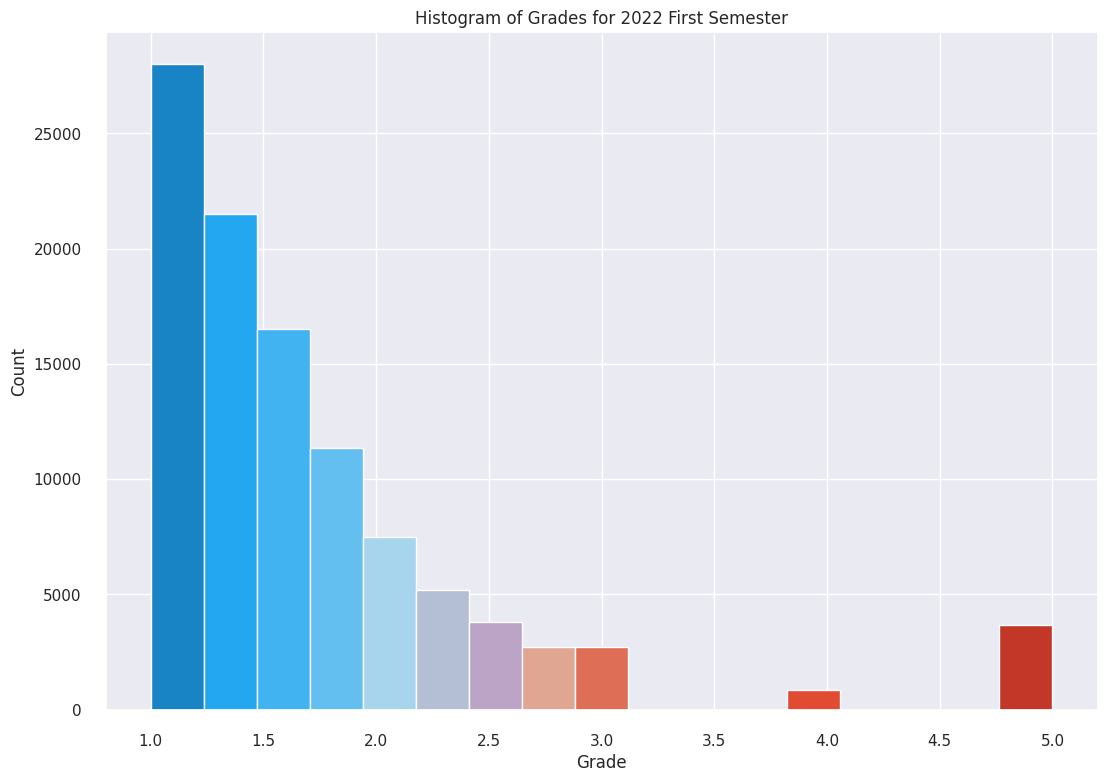

grade
1.00    25181
1.25    20048
1.50    15862
1.75    11465
2.00     7676
2.25     5264
2.50     3814
2.75     2741
3.00     2827
4.00      741
5.00     2880
dtype: int64


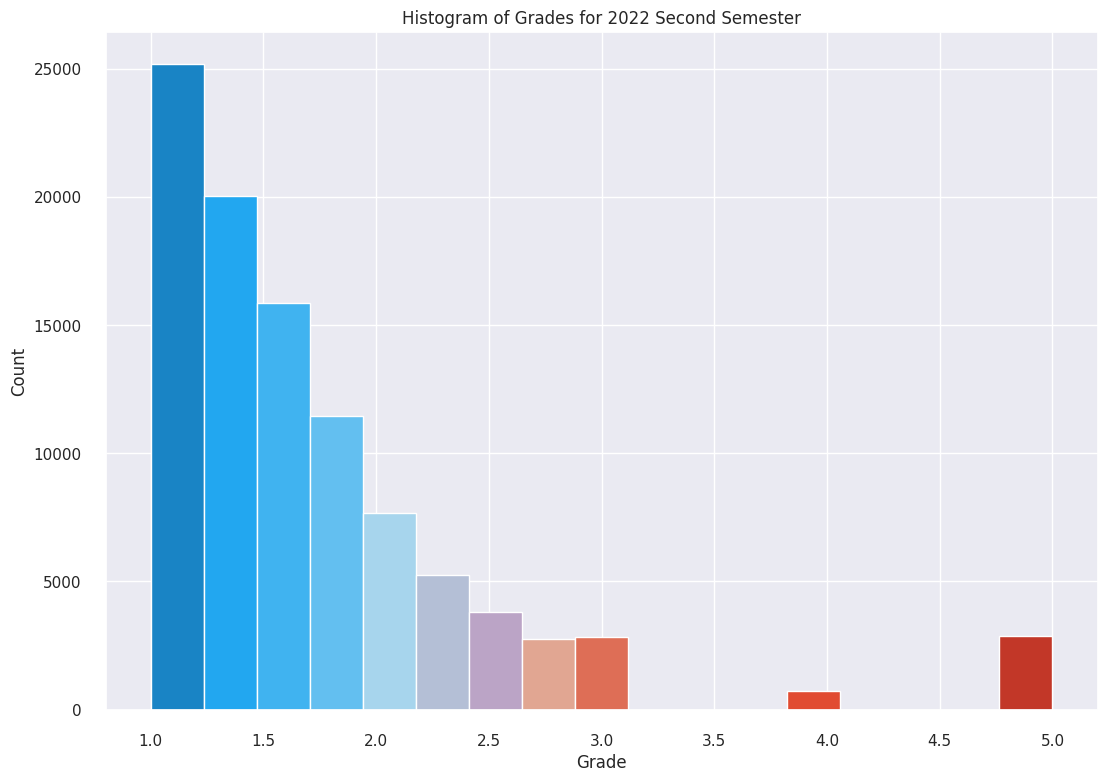

grade
1.00    25832
1.25    21493
1.50    18323
1.75    12705
2.00     8737
2.25     6115
2.50     4597
2.75     3276
3.00     3397
4.00     1044
5.00     3707
dtype: int64


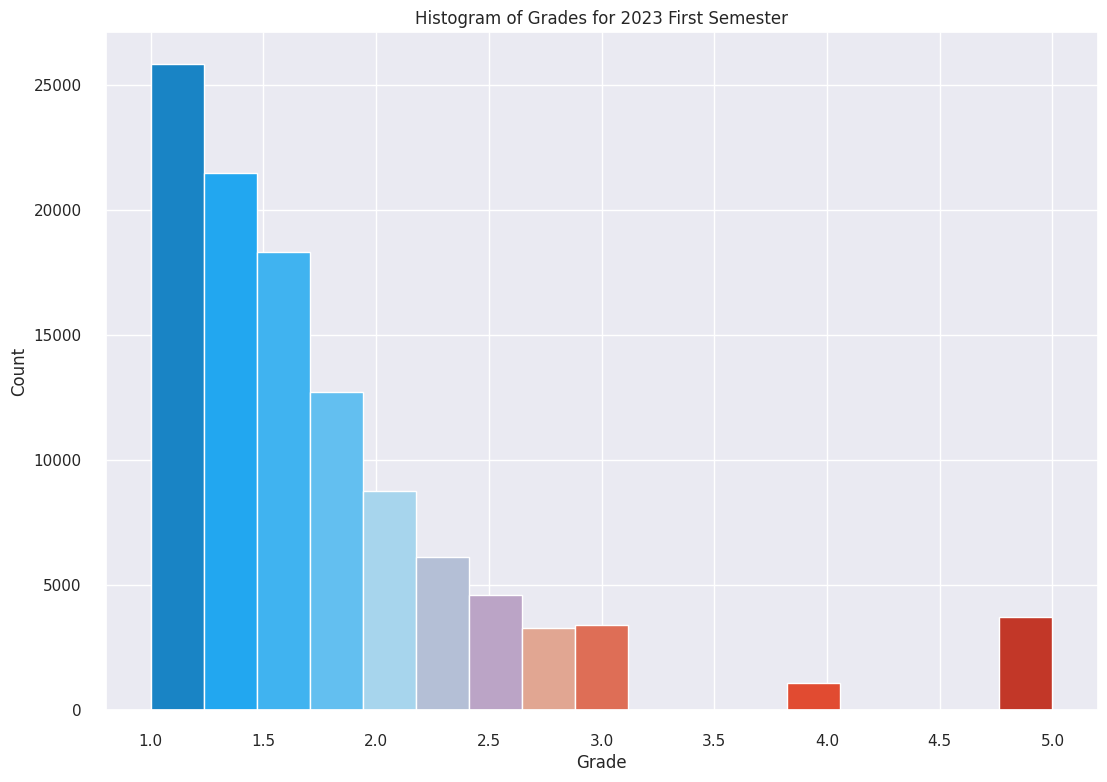

In [ ]:
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

grade_counts = {}
grade_hstack = {}
grade_ecdf = {}


# Arrange data based on number of all grades per semester, and create ECDF for all semesters
for sem in sem_list:
    sorted_data = data[data['semester'] == sem]

    # Calculate grade counts for the current semester
    grade_counts[sem] = sorted_data.groupby('grade').size()
    print(grade_counts[sem])
    bars = plt.hist(grade_counts[sem].index, weights=grade_counts[sem].values, bins=17)
    color_index = 0
    for i, bar in enumerate(bars[2]):
        if bars[0][i] > 0:
            bar.set_facecolor(palette[color_index % len(palette)])
            color_index += 1

    # Add labels and title
    plt.xlabel('Grade')
    plt.ylabel('Count')
    plt.title(f'Histogram of Grades for {sem}')
    plt.grid(True)
    plt.show()

The ECDF can determine the probability that you get a certain grade for a certain semester. The implementation is shown below:

Note: Perhaps in the interactive version, per college ECDF would be better and more interactive.

In [ ]:
# Calculate ECDF
input_grade = 1.22
input_semester = "2022 First Semester"

grade_ecdf = ECDF(grade_counts[input_semester].index)
grade_list = [1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 4.00, 5.00]
print (grade_ecdf)

print(f'Probability to get a grade equal or higher than {input_grade}: %.3f' % grade_ecdf(input_grade))

Probability to get a grade equal or higher than 1.22: 0.091


Segment 1: y = 0.0000x + 0.0909 for x in [-inf, 1.0]
Segment 2: y = 0.3636x + -0.2727 for x in [1.0, 1.25]
Segment 3: y = 0.3636x + -0.2727 for x in [1.25, 1.5]
Segment 4: y = 0.3636x + -0.2727 for x in [1.5, 1.75]
Segment 5: y = 0.3636x + -0.2727 for x in [1.75, 2.0]
Segment 6: y = 0.3636x + -0.2727 for x in [2.0, 2.25]
Segment 7: y = 0.3636x + -0.2727 for x in [2.25, 2.5]
Segment 8: y = 0.3636x + -0.2727 for x in [2.5, 2.75]
Segment 9: y = 0.3636x + -0.2727 for x in [2.75, 3.0]
Segment 10: y = 0.0909x + 0.5455 for x in [3.0, 4.0]
Segment 11: y = 0.0909x + 0.5455 for x in [4.0, 5.0]


/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in subtract
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


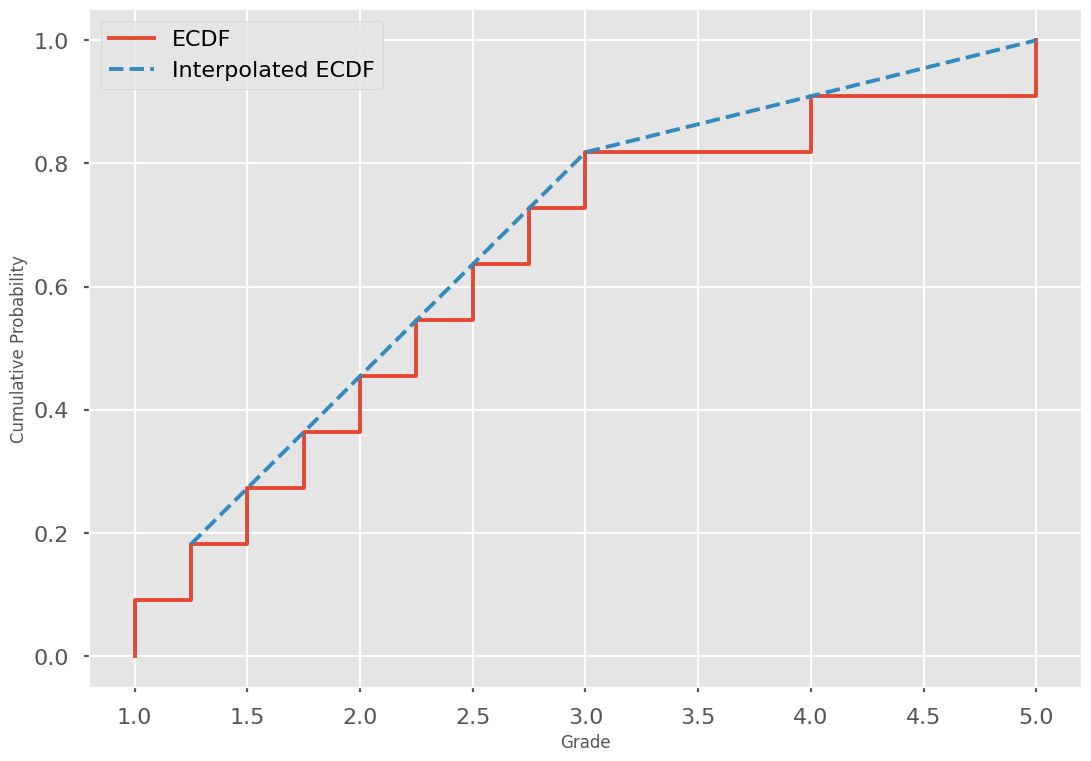

In [ ]:
from scipy.interpolate import interp1d

x = grade_ecdf.x
y = grade_ecdf.y

# Create the interpolation function
ecdf_interpolated = interp1d(x, y, kind='linear', fill_value="extrapolate")


# Calculate slope (m) and intercept (b) for each segment
slopes = []
intercepts = []

for i in range(1, len(x)):
    m = (y[i] - y[i-1]) / (x[i] - x[i-1])
    b = y[i] - m * x[i]
    slopes.append(m)
    intercepts.append(b)
    print(f"Segment {i}: y = {m:.4f}x + {b:.4f} for x in [{x[i-1]}, {x[i]}]")

# Plot the ECDF and the interpolated function
plt.step(x, y, where="post", label="ECDF")
plt.plot(x, ecdf_interpolated(x), label="Interpolated ECDF", linestyle="--")
plt.xlabel('Grade')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

## Grade Distributions

The share of each grade per semester is shown below.

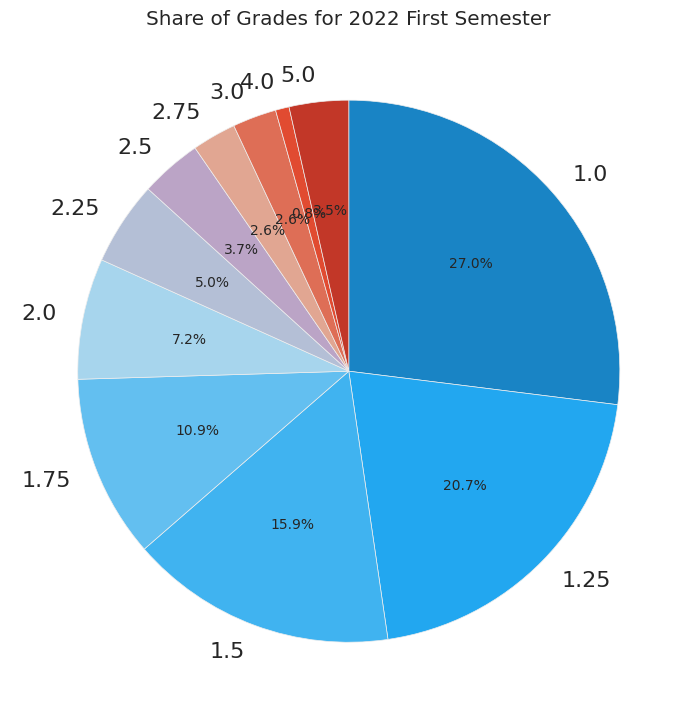

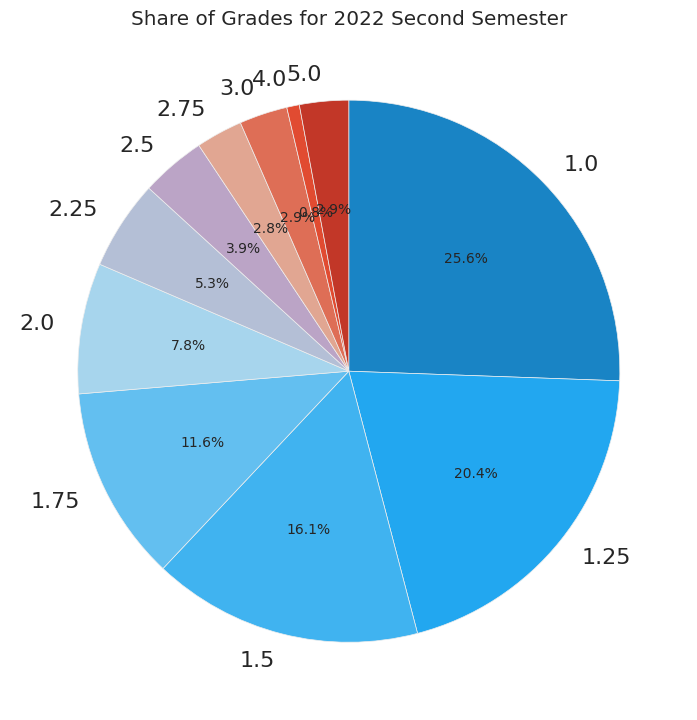

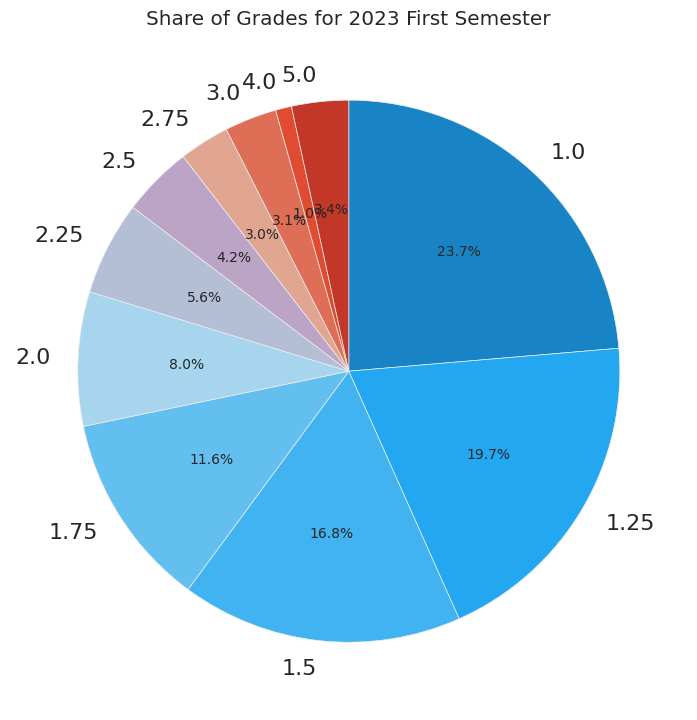

In [ ]:
for sem in sem_list:
    plt.pie(grade_counts[sem].values, labels = grade_counts[sem].index, autopct='%1.1f%%',startangle=90, counterclock = False, colors = palette)
    plt.title(f'Share of Grades for {sem}')
    plt.show()


## Shannon Entropy

The Shannon Entropy shows the uncertainty of a random variable's distribution. The higher the entropy, the more "unpredictable" a data set is. For a grade scale of 1.0 - 5.0, the maximum Shannon entropy is 3.4594.

In [ ]:
import numpy as np

n = 11
entropy_max = -np.sum([(1/n) * np.log2(1/n) for i in range(n)])

print(f"Maximum Shannon Entropy for a 1-5 grade scale: {entropy_max:.4f}")

Maximum Shannon Entropy for a 1-5 grade scale: 3.4594 bits


Therefore, values closer to this maximum indicate that a data set is more unpredictable.

Entropy, in the context of exam results, indicates how much a data set gives information on its students. For example, if everyone got a perfect score in an exam, the entropy would be zero, therefore we can judge the grading system as not that impactful as it does not give information on the standing of students. Therefore, if entropy is high, we can say that a grading system is useful in segregating its students.

However, note that it does not compute the distance between scores, thus Shannon entropy might not give an exact indicator of grade scale robustness than one might expect. Still, the entropy values shown below are high, indicating that the grading system might still be robust despite grade inflation concerns.

Reference: https://academia.stackexchange.com/questions/15335/how-to-measure-entropy-of-exam-results

In [ ]:
entropy = {}

for sem in sem_list:
  probabilities = [count / grade_counts[sem].values.sum() for count in grade_counts[sem]]
  entropy[sem] = -np.sum([p * np.log2(p) if p != 0 else 0 for p in probabilities])
  print(f"Shannon Entropy for {sem}: {entropy[sem]:.4f}")


Shannon Entropy for 2022 First Semester: 2.9184
Shannon Entropy for 2022 Second Semester: 2.9432
Shannon Entropy for 2023 First Semester: 3.0005


# Further Study

https://www.cambridge.org/core/journals/journal-of-agricultural-and-applied-economics/article/grade-inflation-or-grade-increase/91E55E71F14A756068C0A9A0A3D8C8E5 (di ko pa nababasa)

# Individual Results Per College

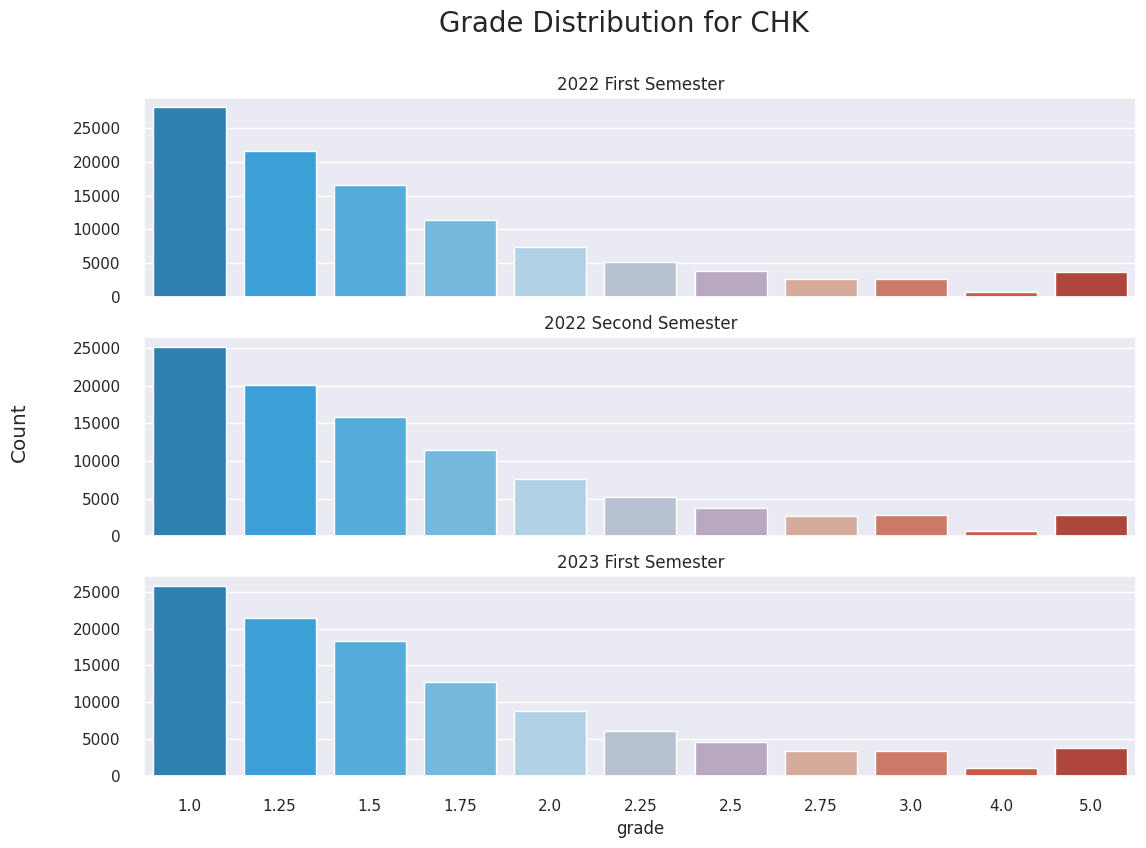

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


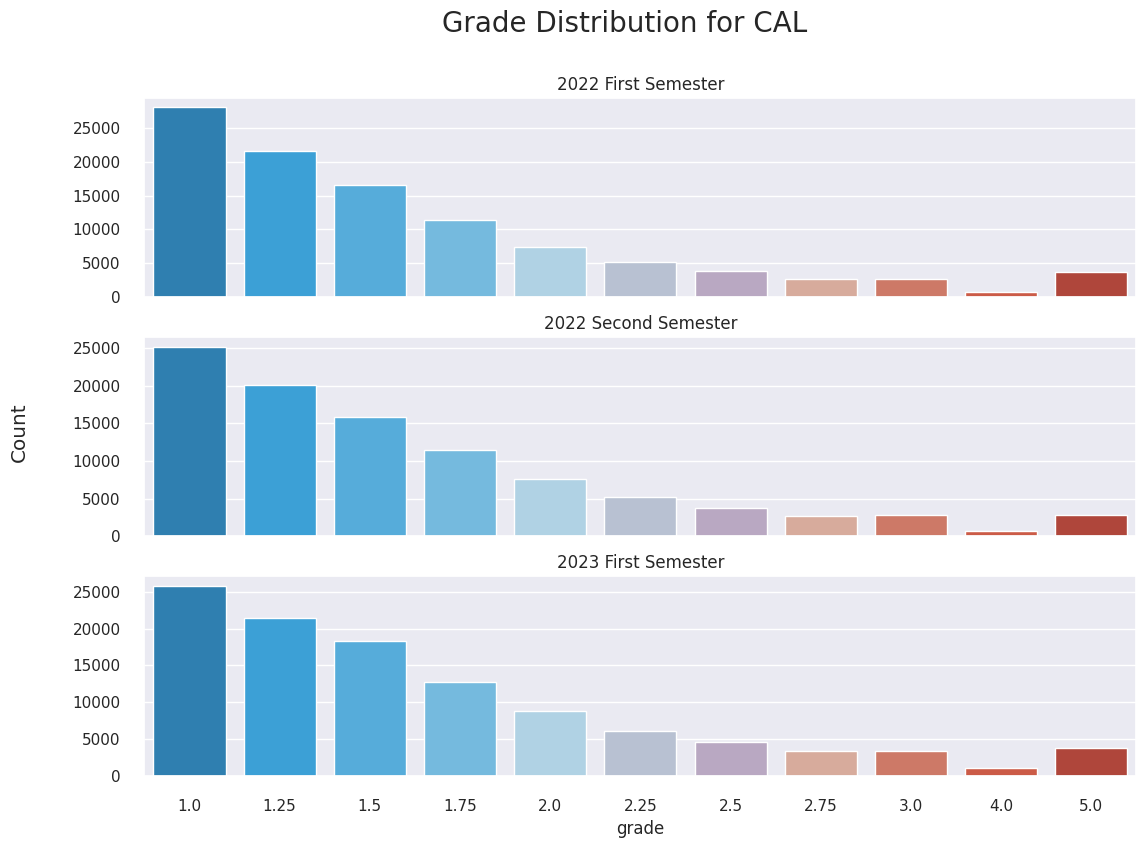

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


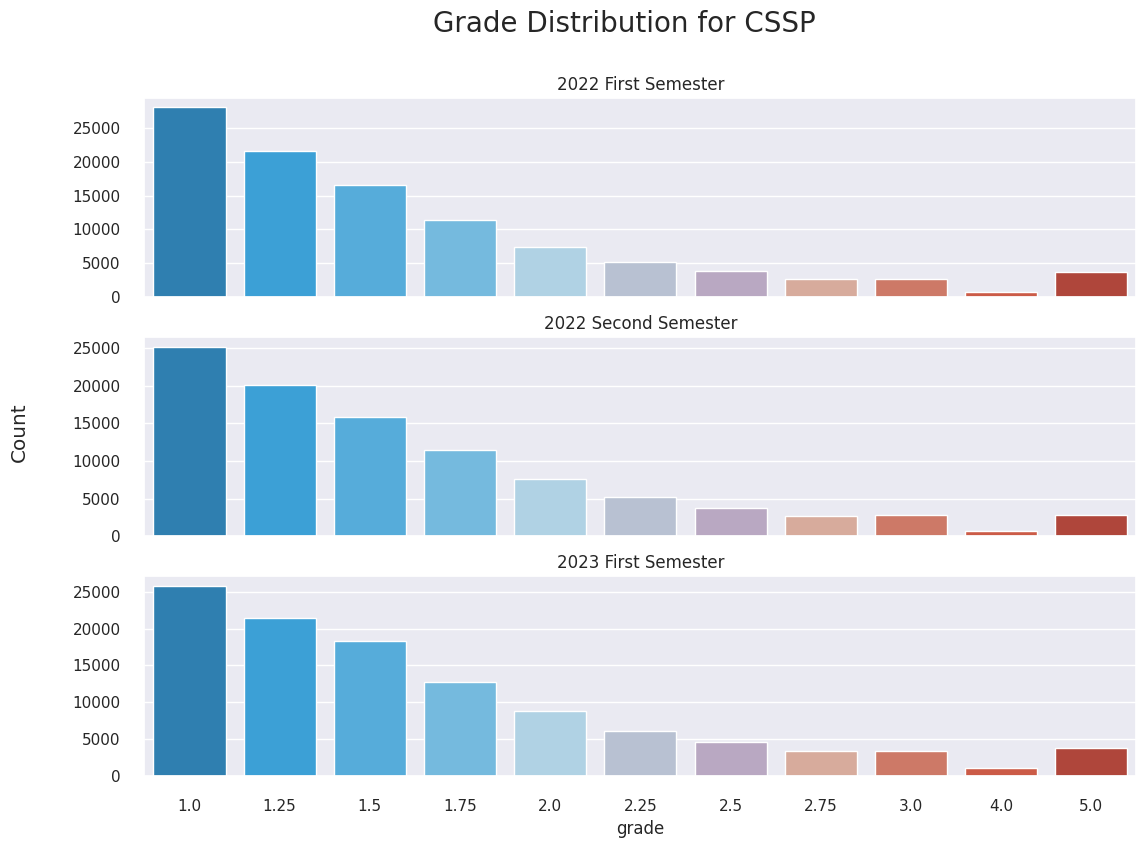

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


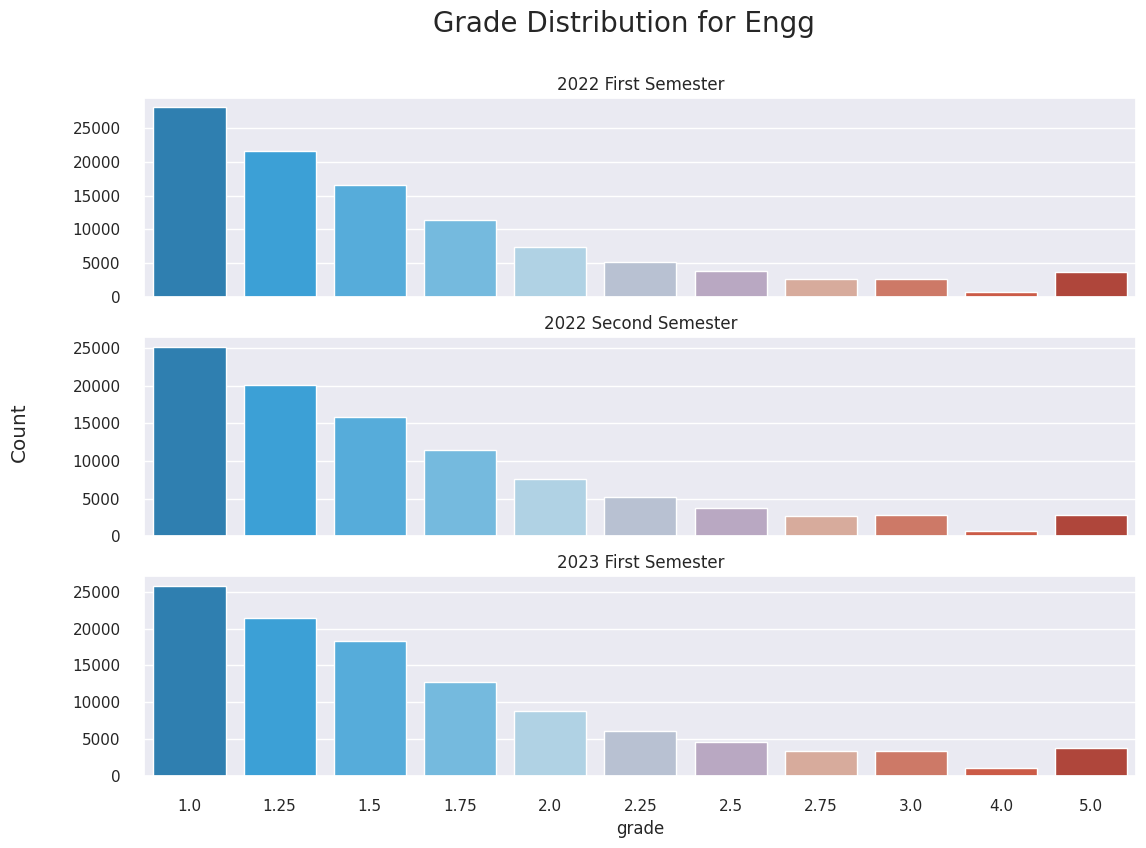

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


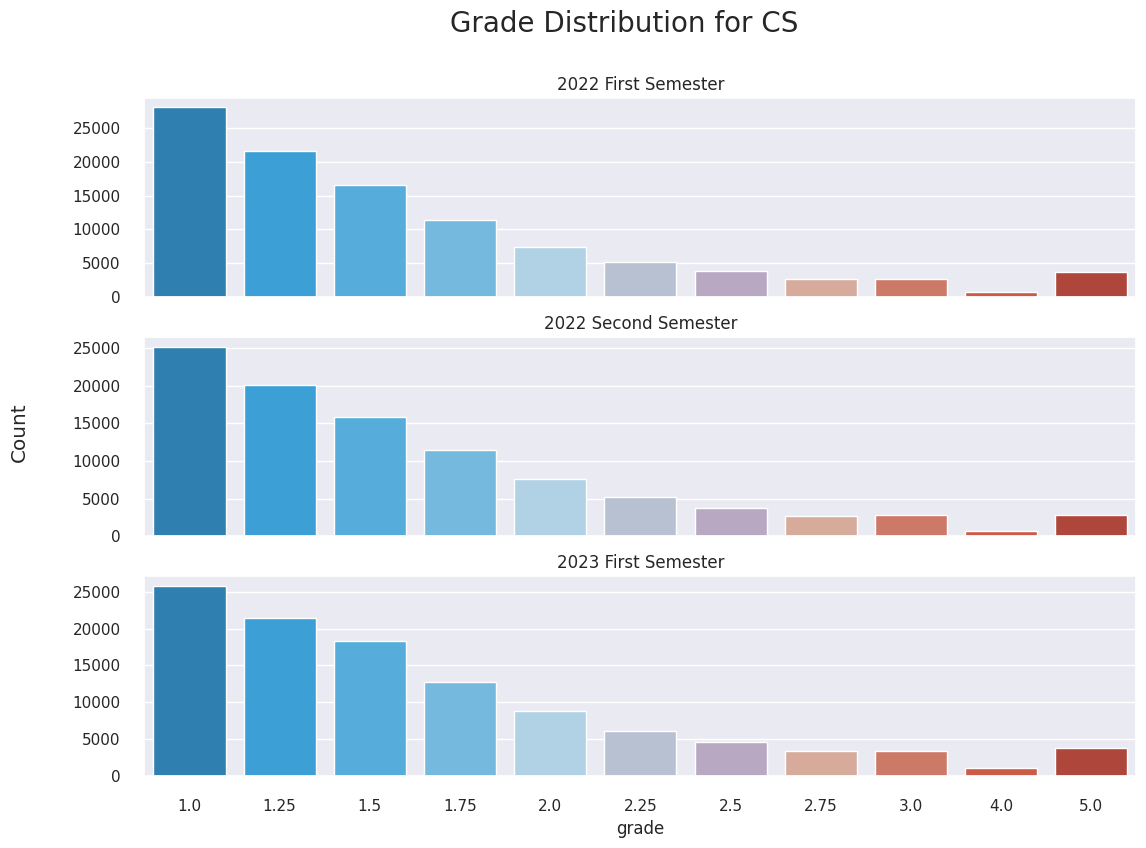

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


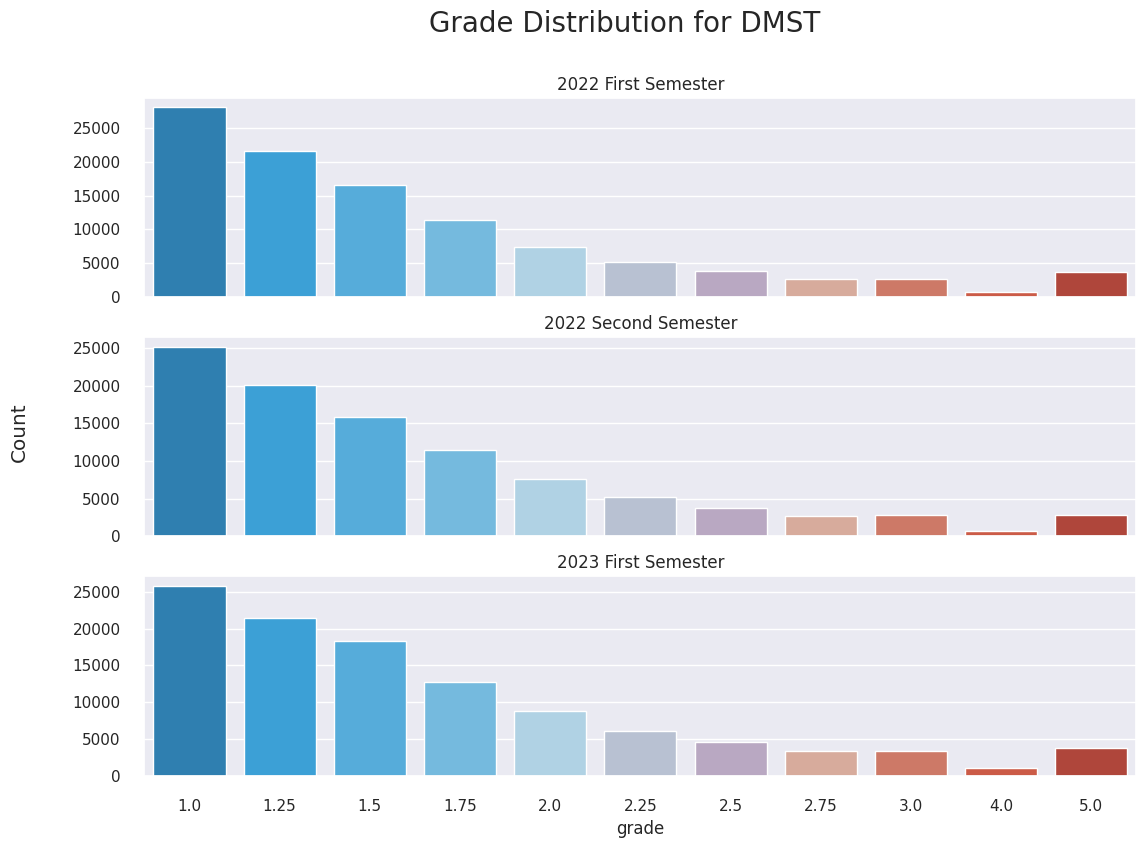

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


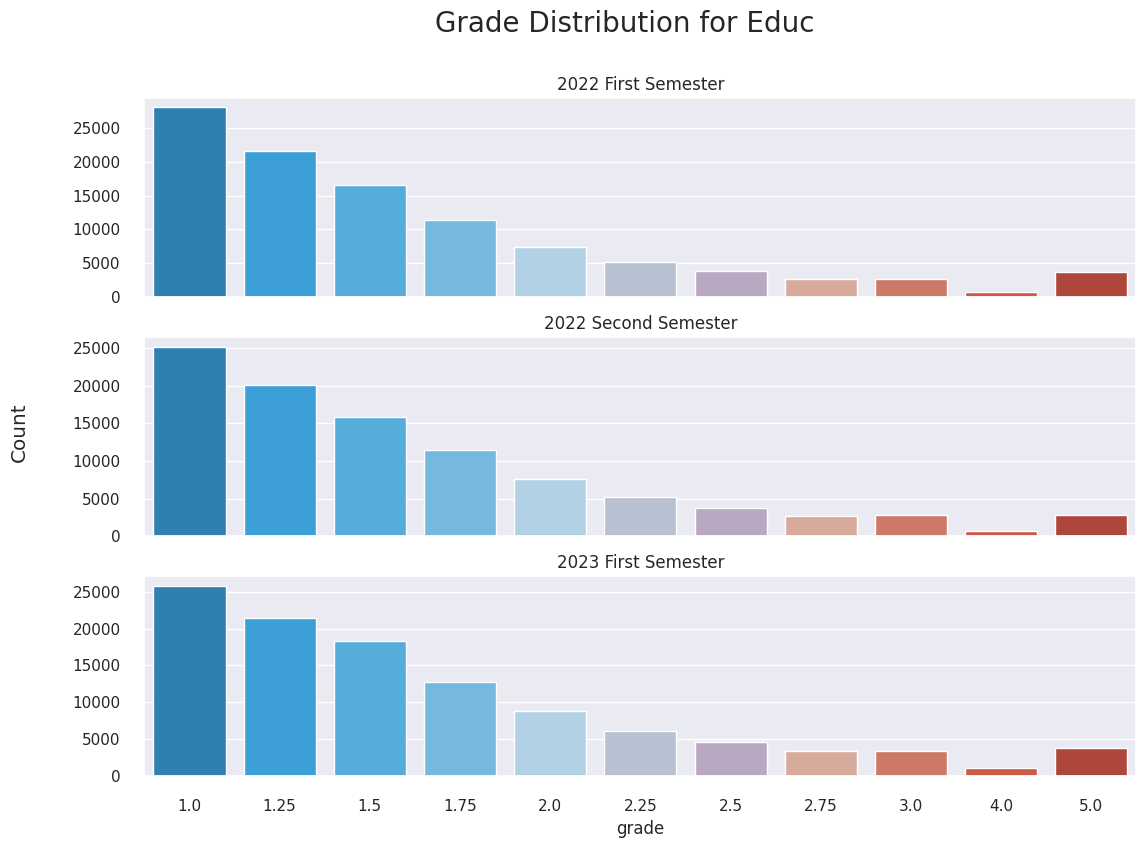

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


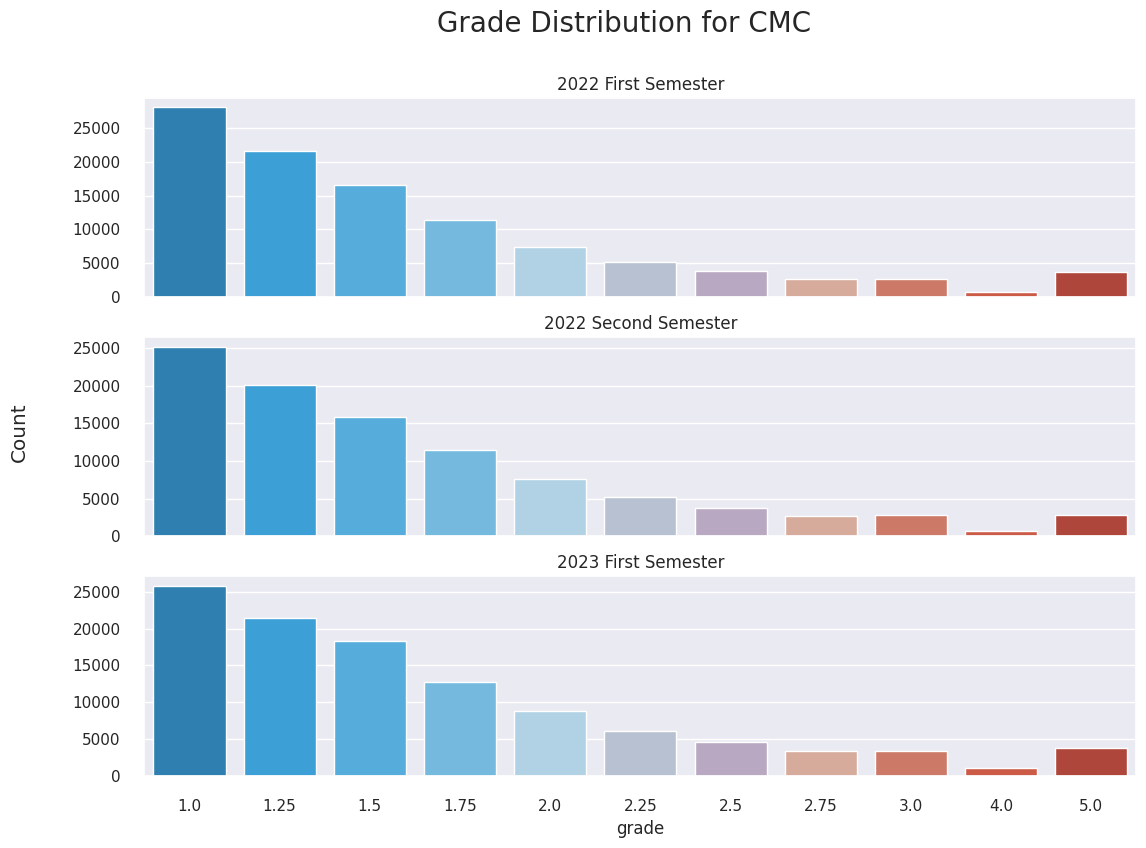

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.683084   

                                       
  median mode       std   count  skew  
0    1.5  1.0  0.838283  311510  2.28  


KeyboardInterrupt: 

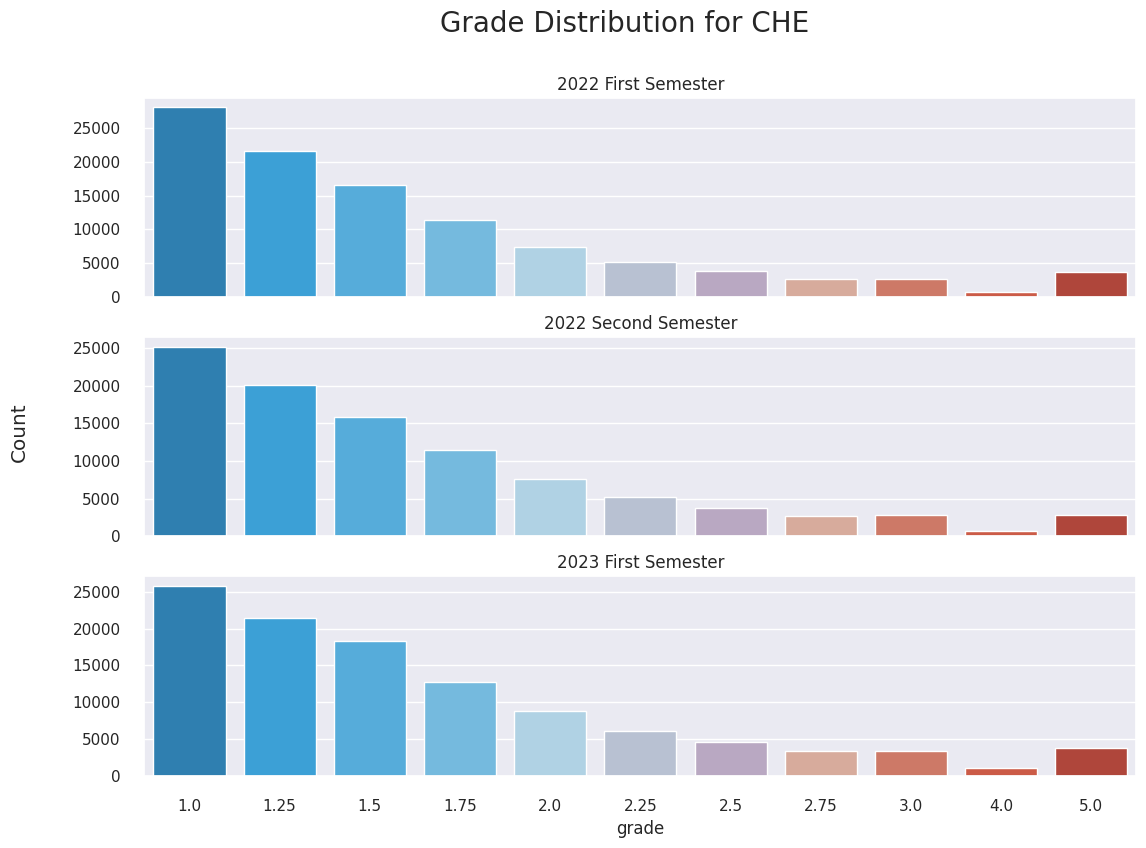

In [ ]:
# Plot Each College Data
for college in offering_college:
  fig, axs = plt.subplots(3, sharex = True) # Creates Figure
  fig.suptitle(f'Grade Distribution for {college}', fontsize = 20)
  fig.supylabel('Count')
  statistics = {}
  grades_expanded = []


  for i, sem in enumerate(sem_list):
    sns.barplot(ax = axs[i], x=grade_counts[sem].index, y=grade_counts[sem].values, palette = palette).set(title = sem)

    for grade, count in grade_counts[sem].items(): # Calculation of Statistics
      grades_expanded.extend([grade] * count)
      grades_series = pd.Series(grades_expanded)
      statistics[sem, "mean"] = grades_series.mean()
      statistics[sem, "median"] = grades_series.median()
      statistics[sem, "mode"] = grades_series.mode().values
      statistics[sem, "std"] = grades_series.std()
      statistics[sem, "count"] = grades_series.count()
      statistics[sem, "skew"] = round(grades_series.skew(),2)

  plt.show()
  statdf = pd.DataFrame(statistics)
  print(statdf)


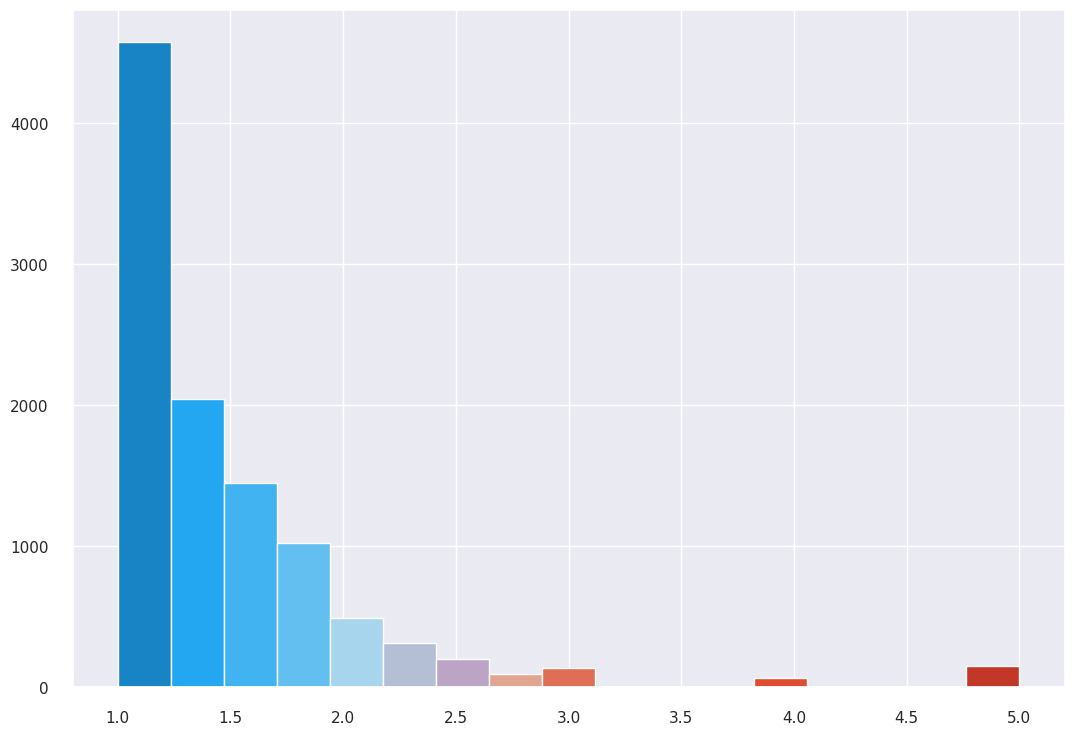

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


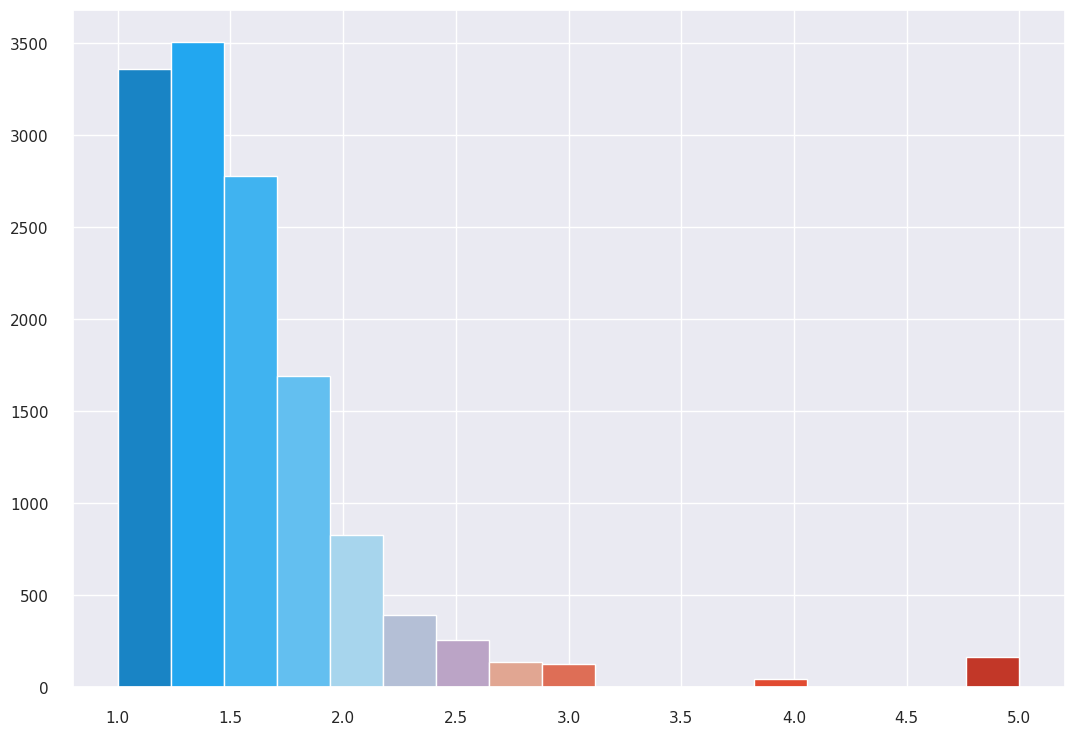

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


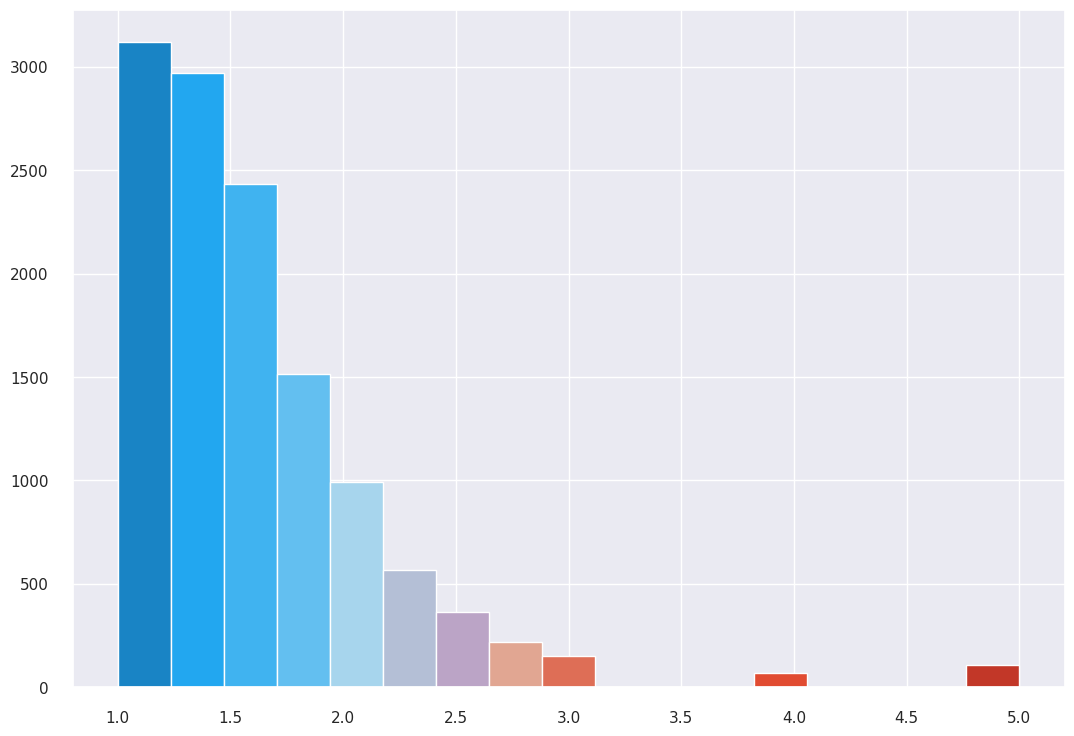

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


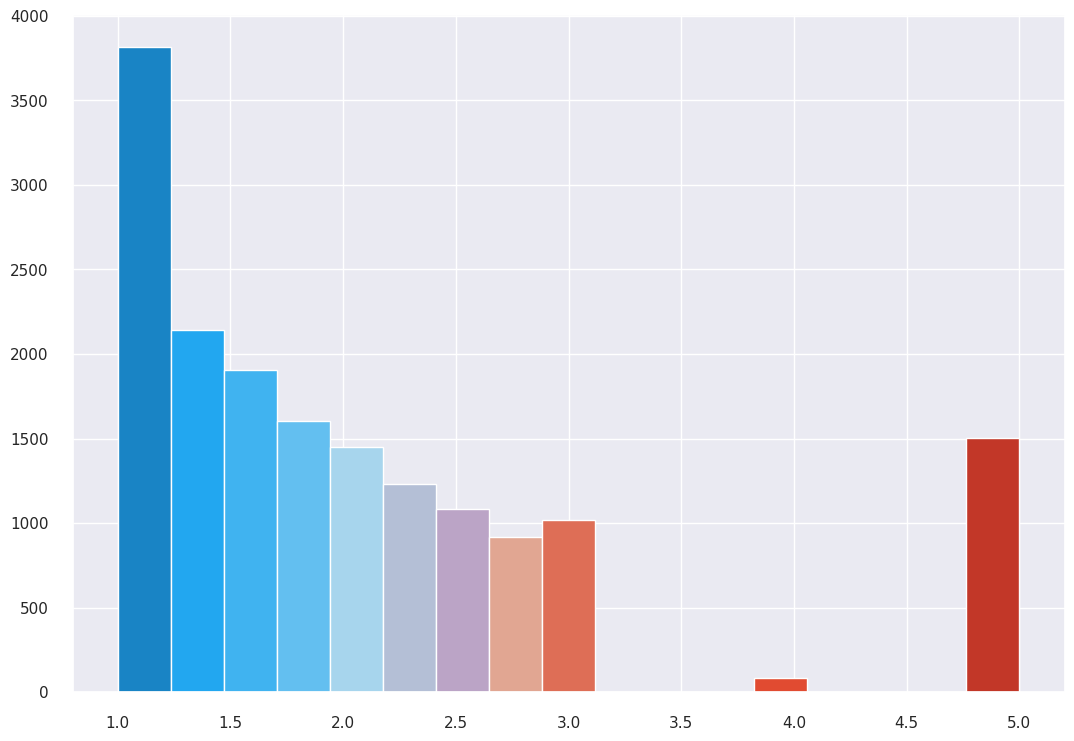

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


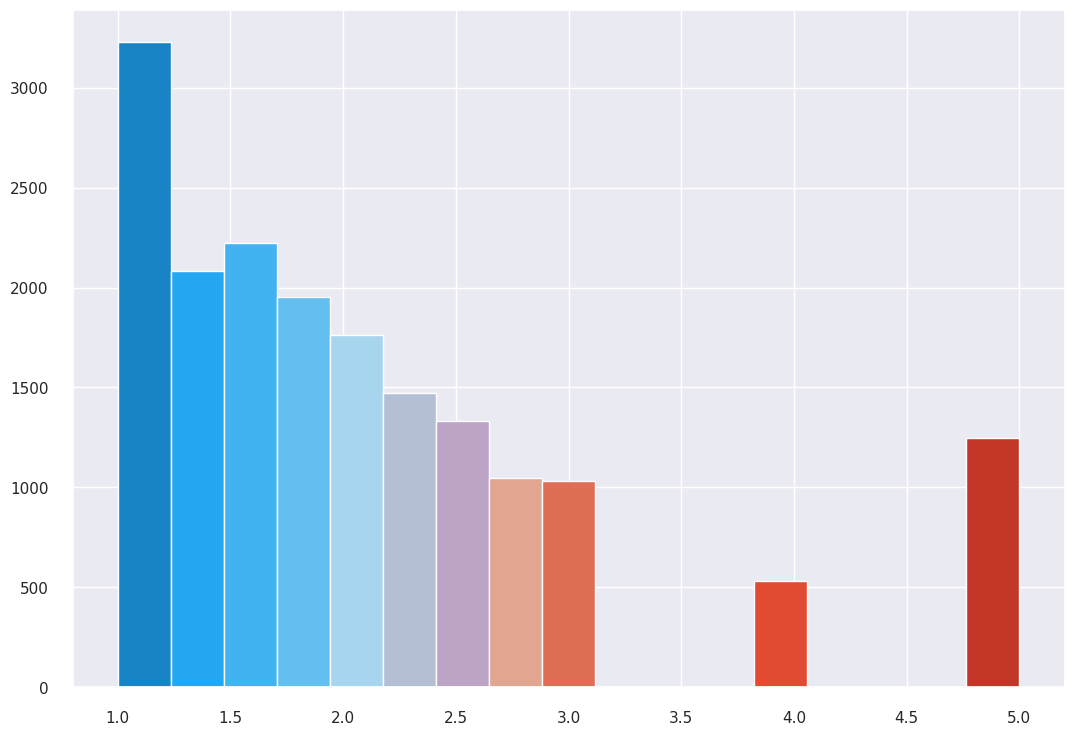

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


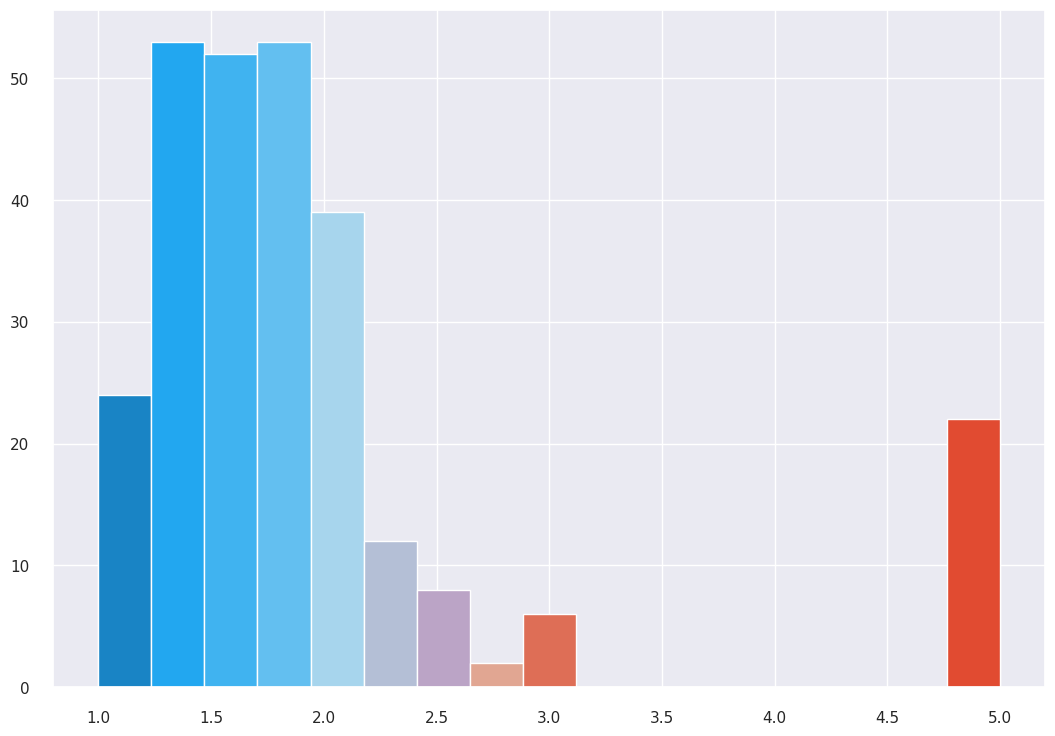

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


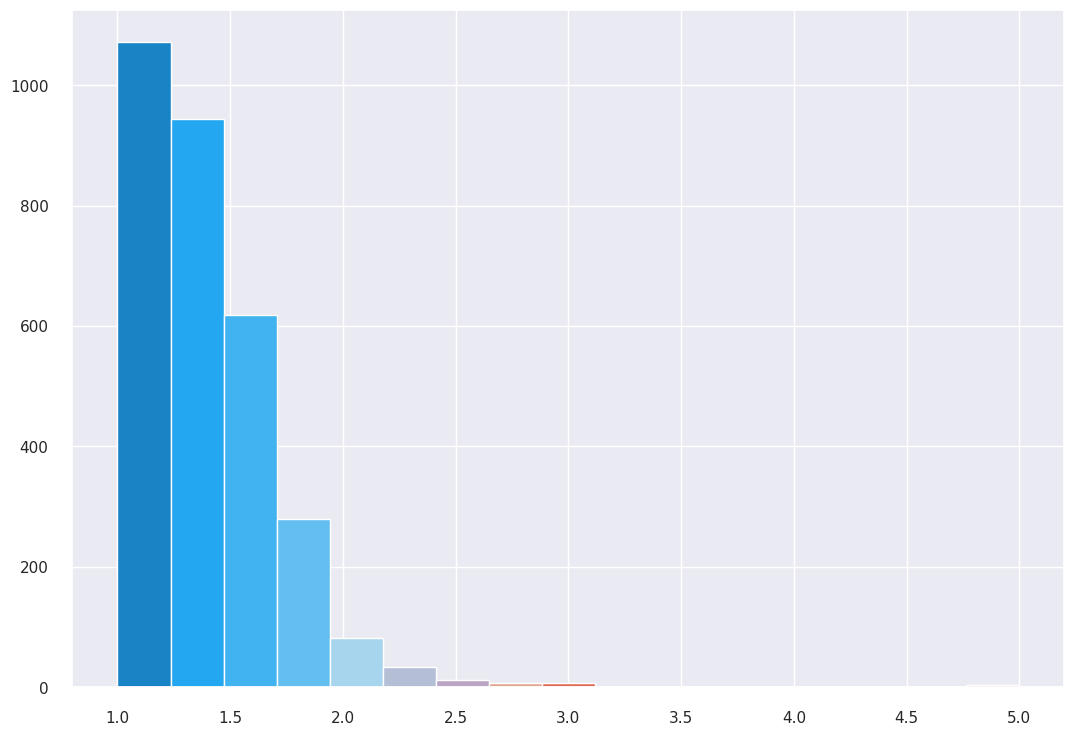

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


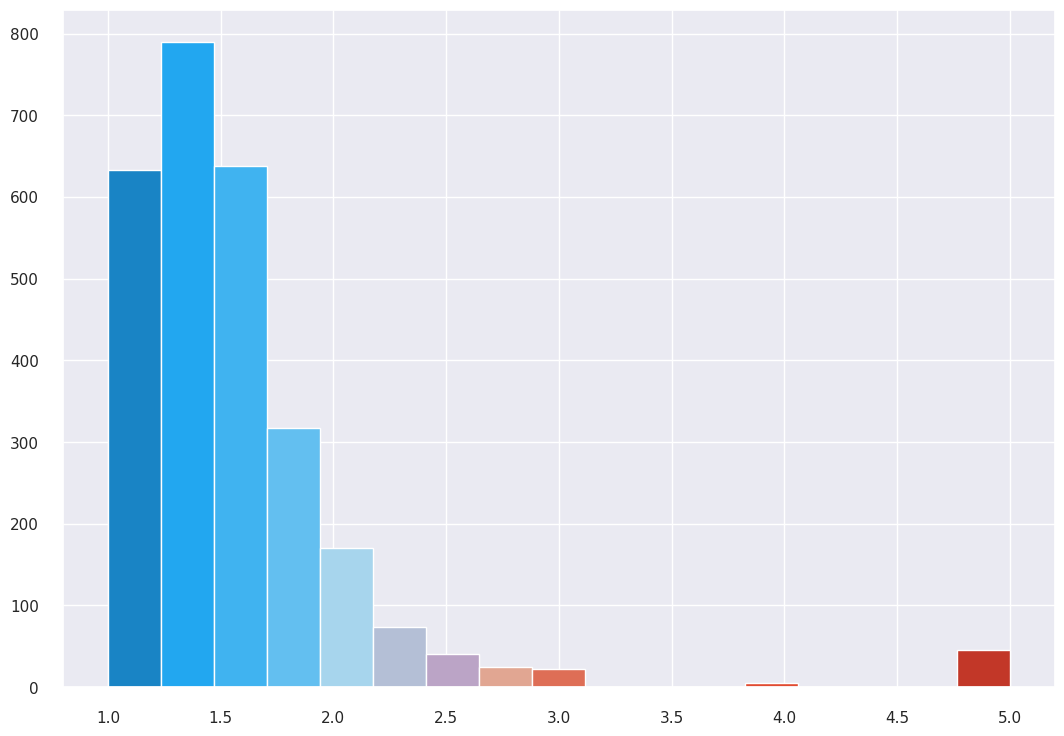

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


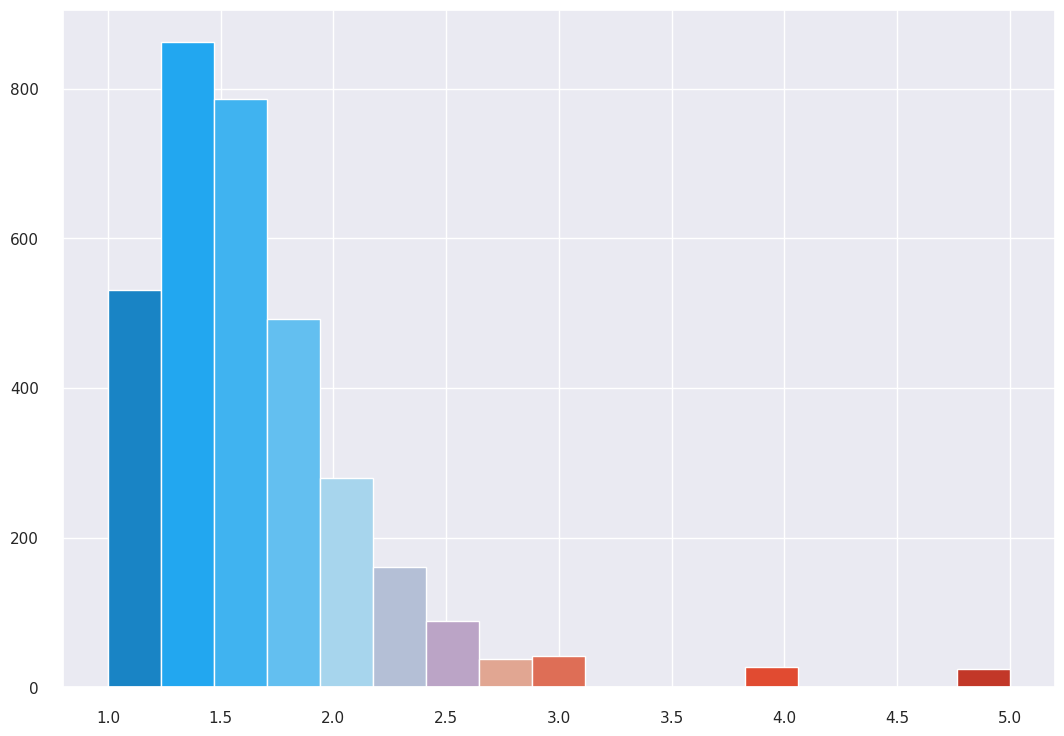

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


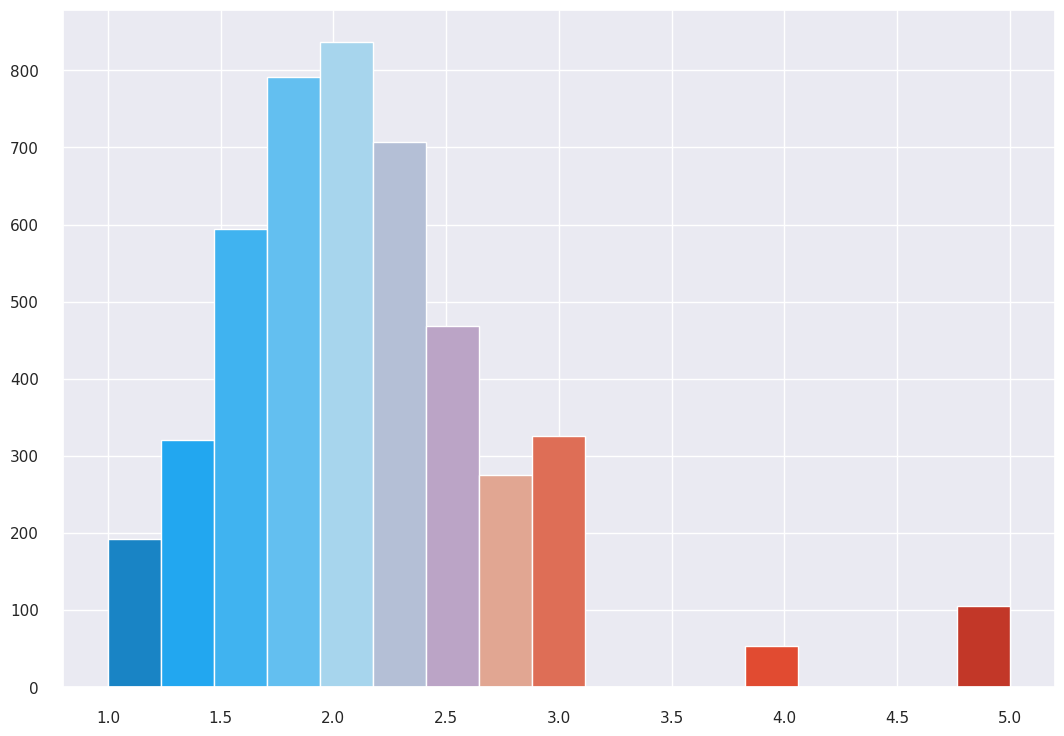

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


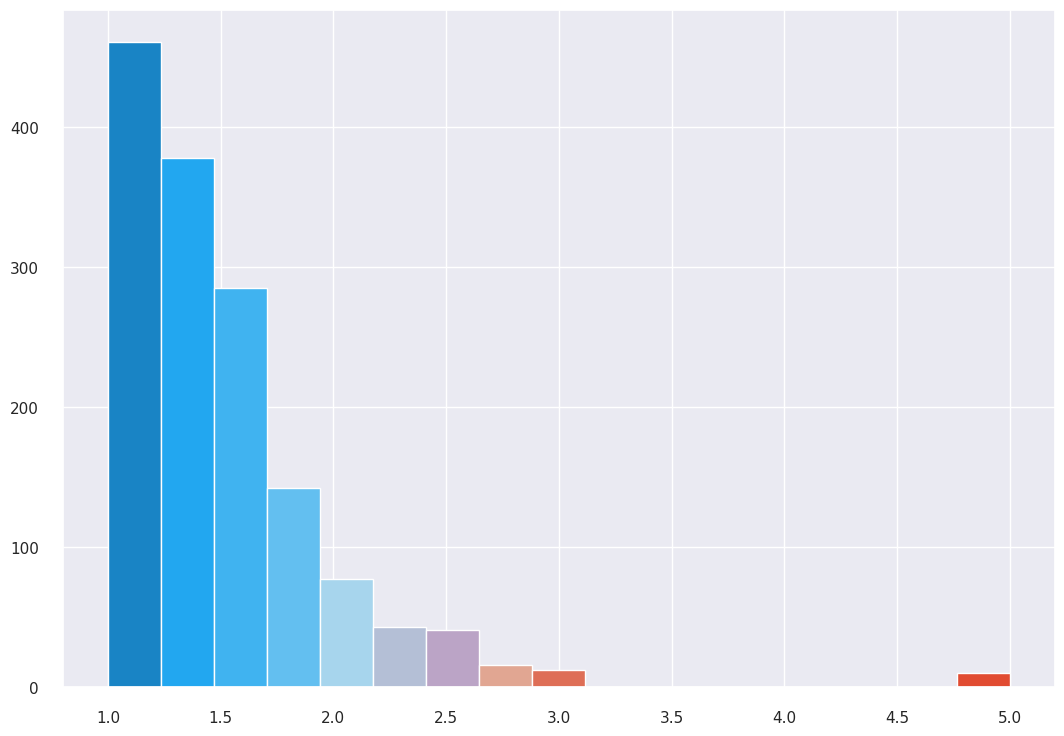

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


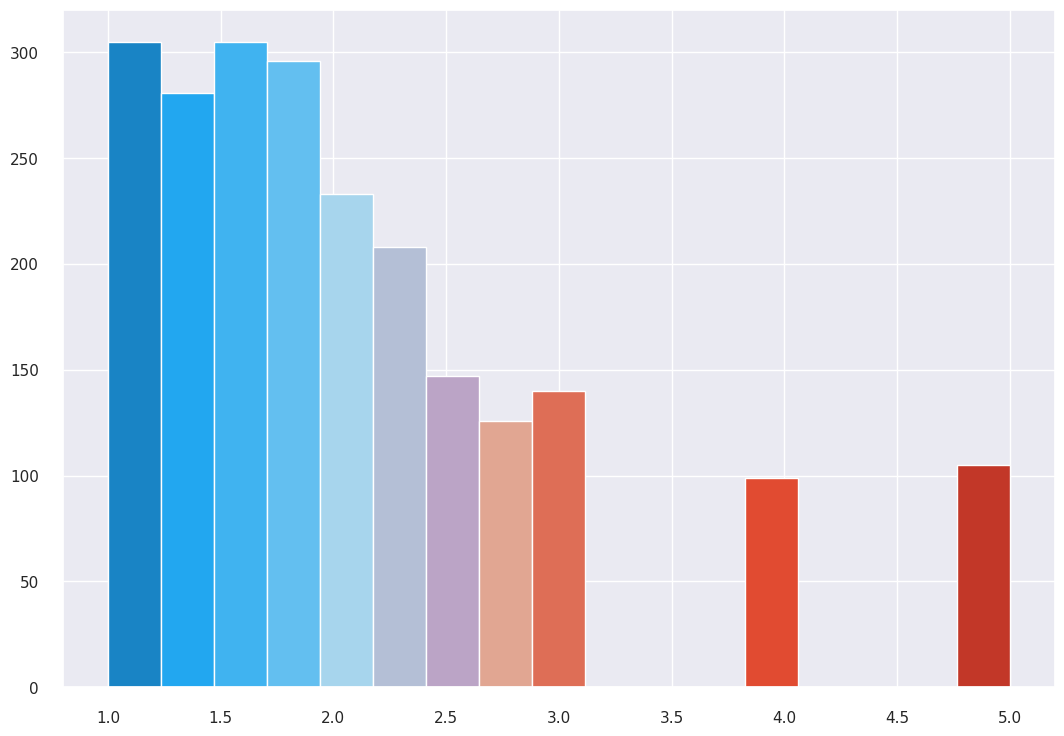

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


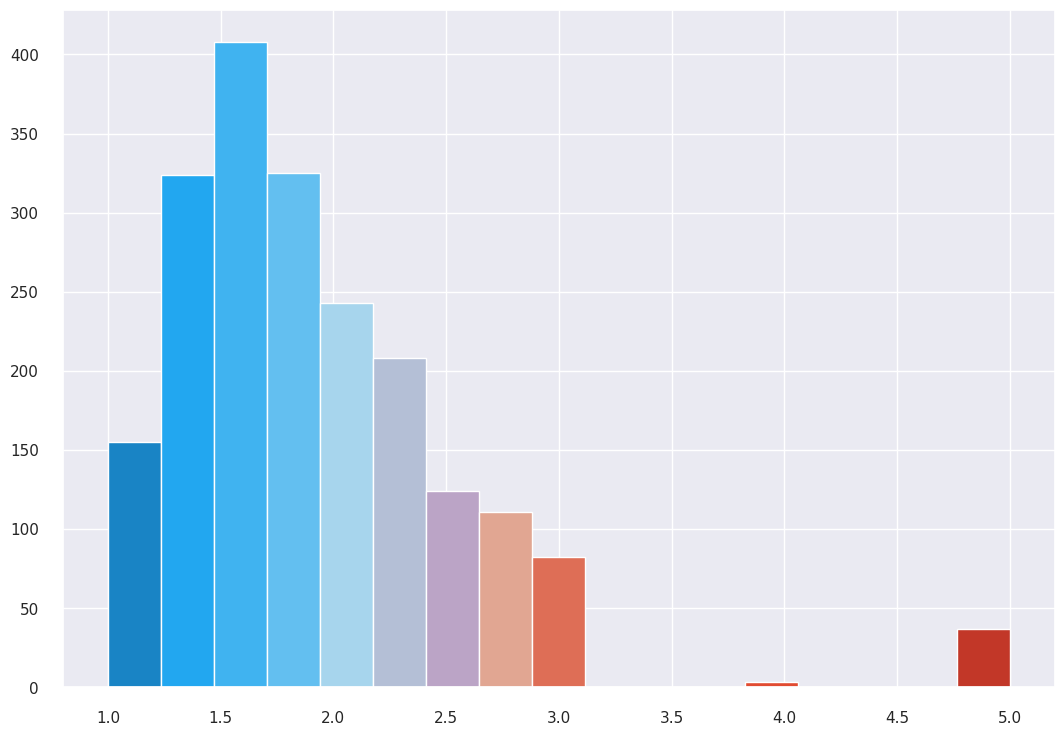

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


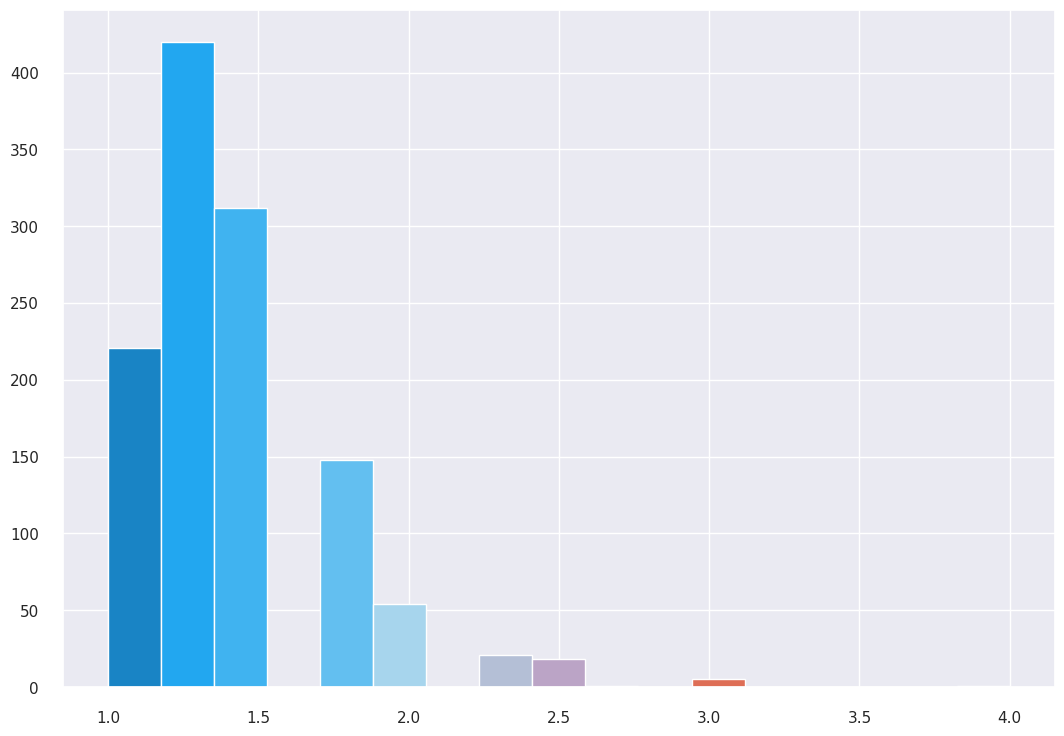

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


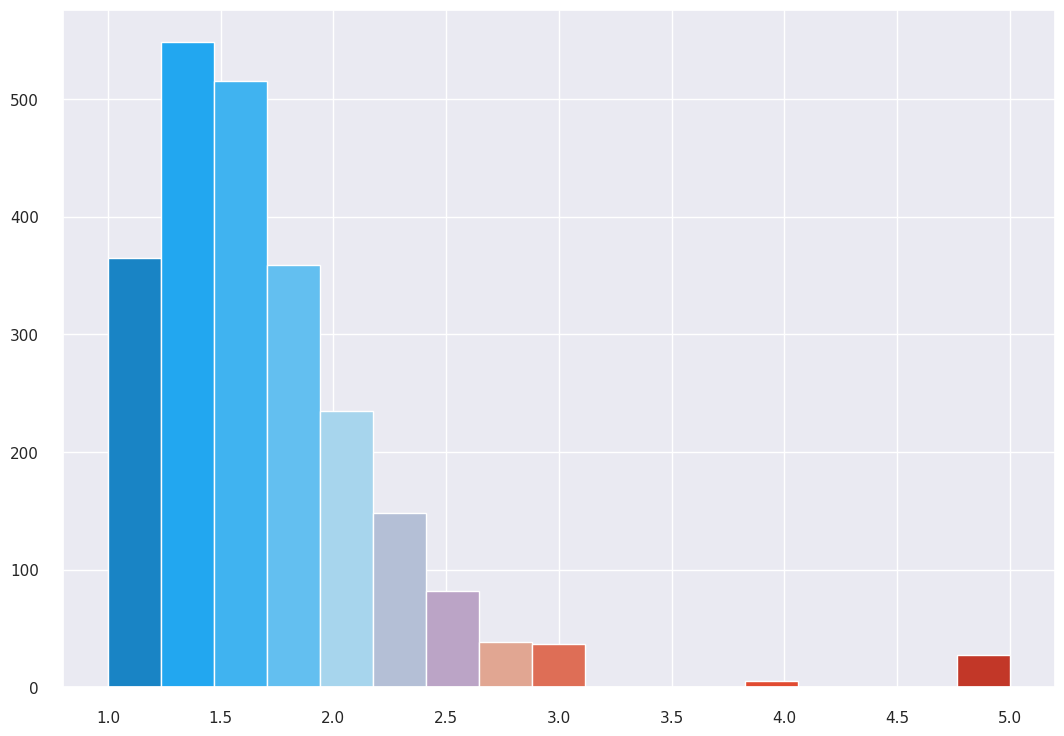

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


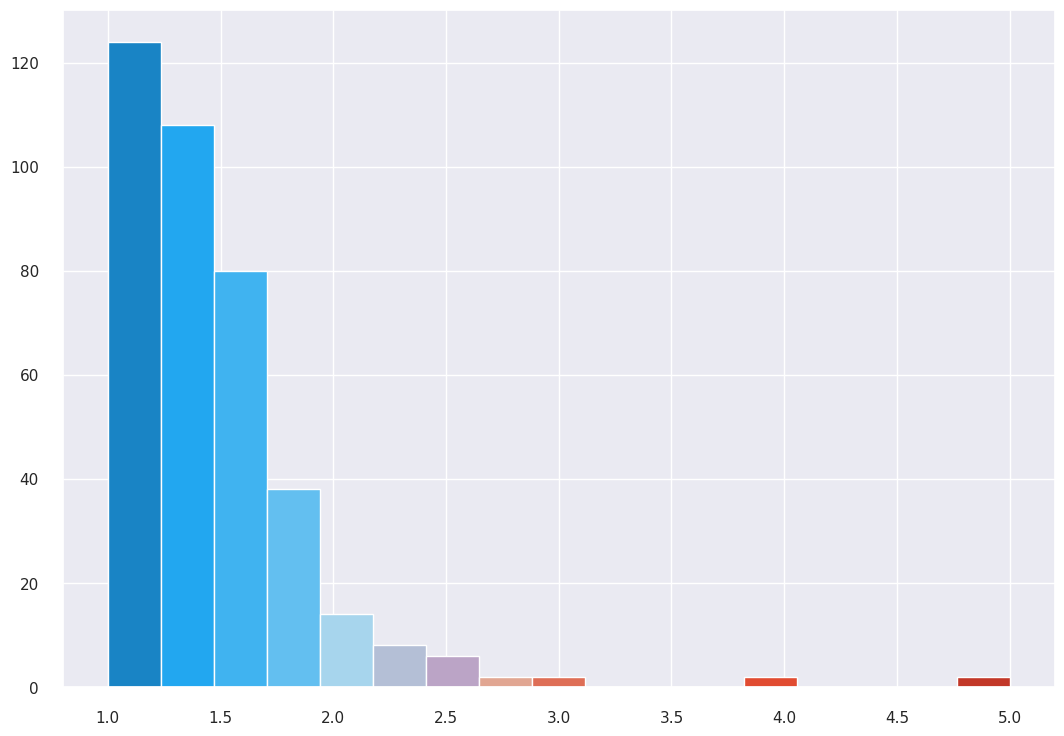

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


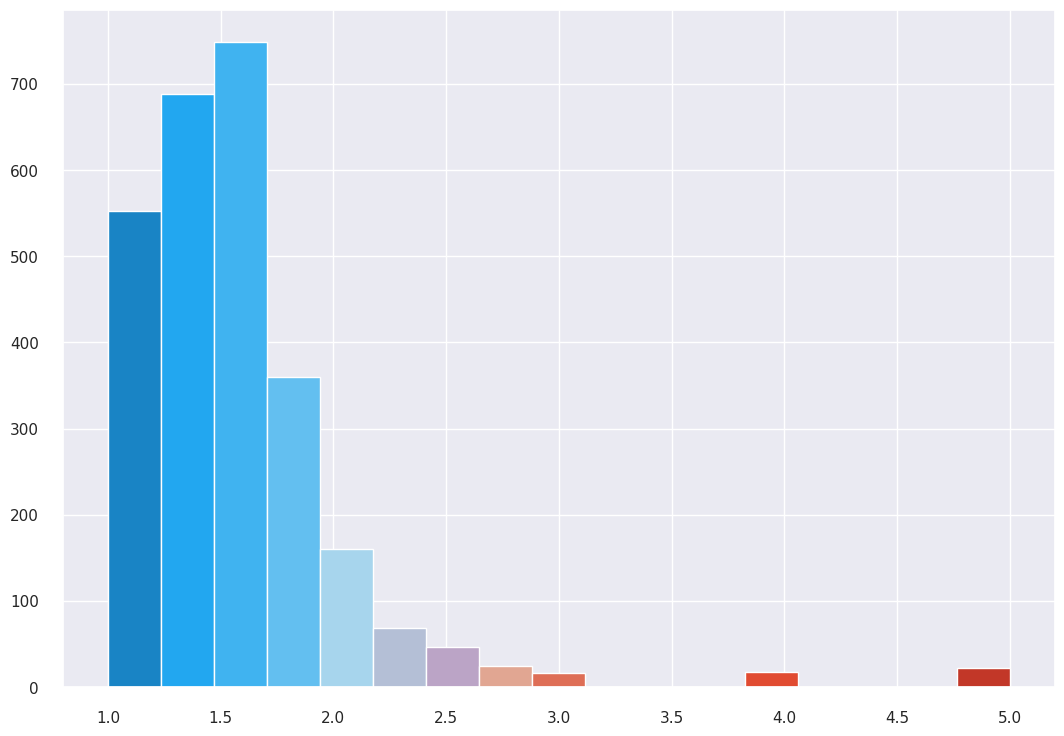

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


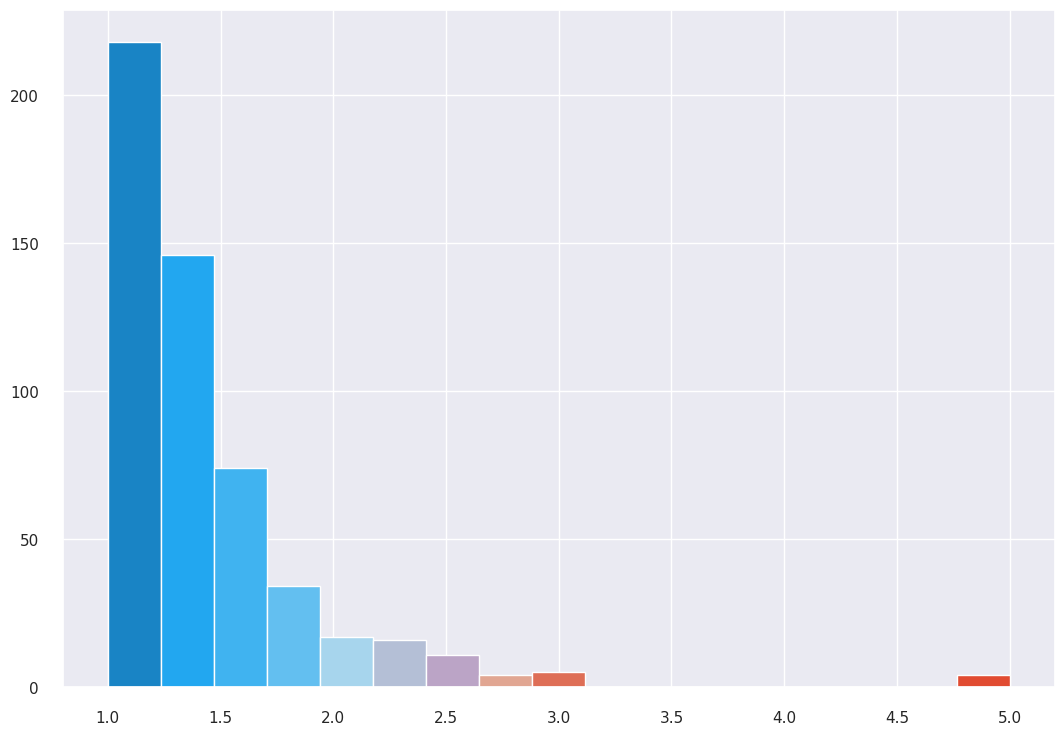

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


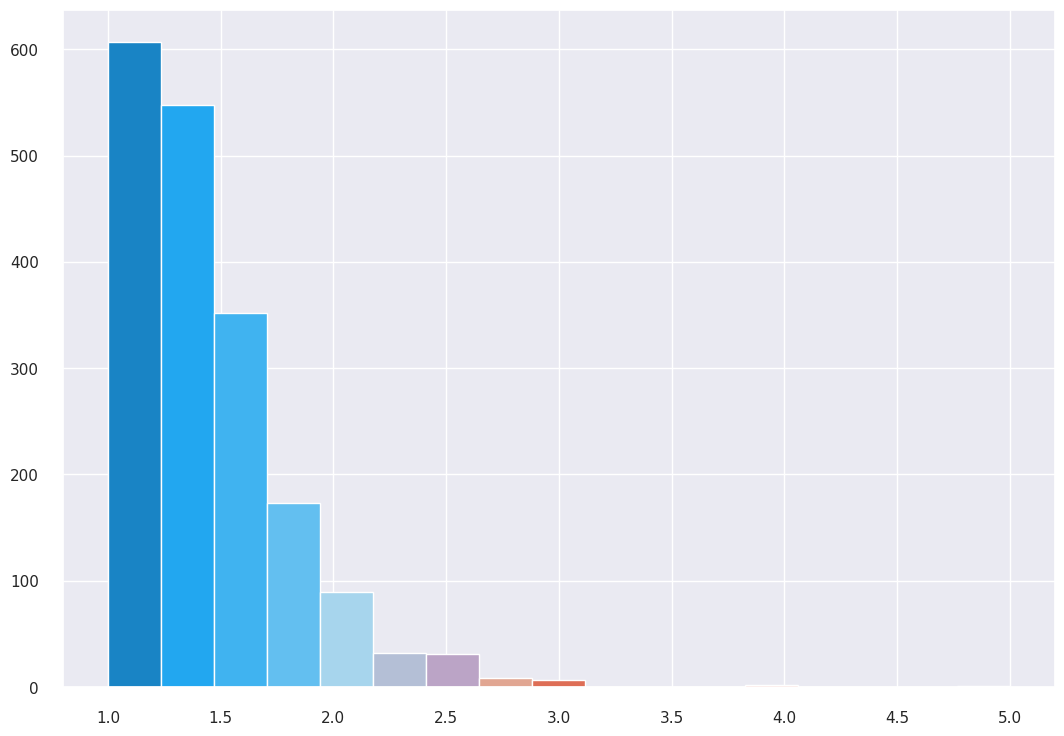

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


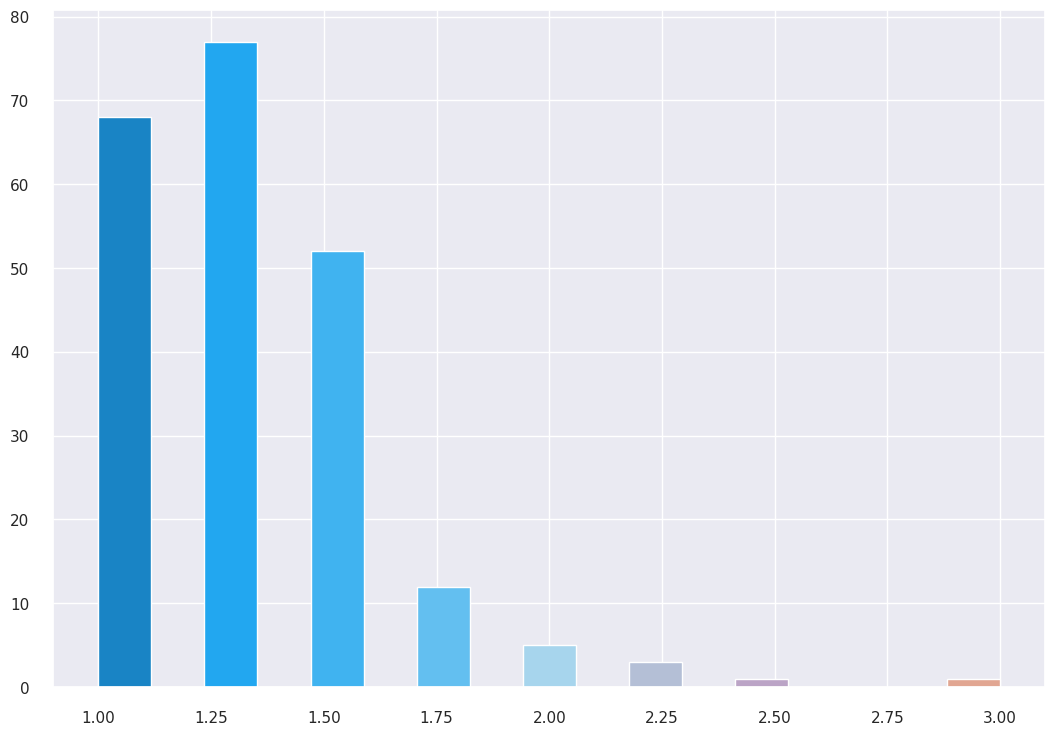

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


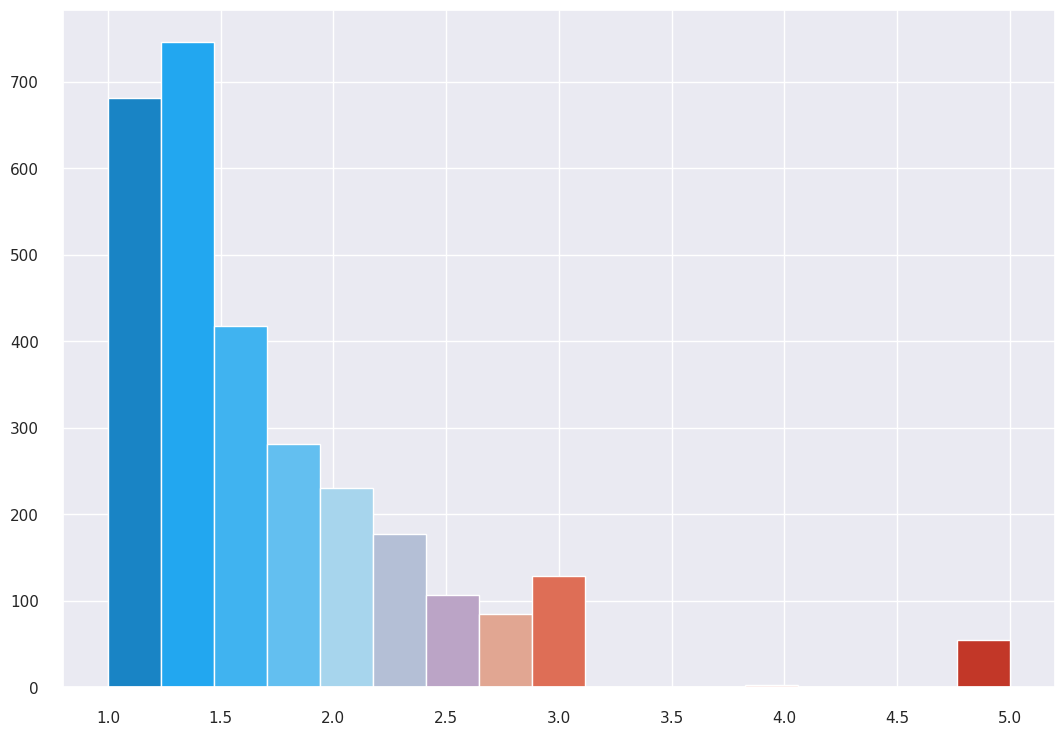

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


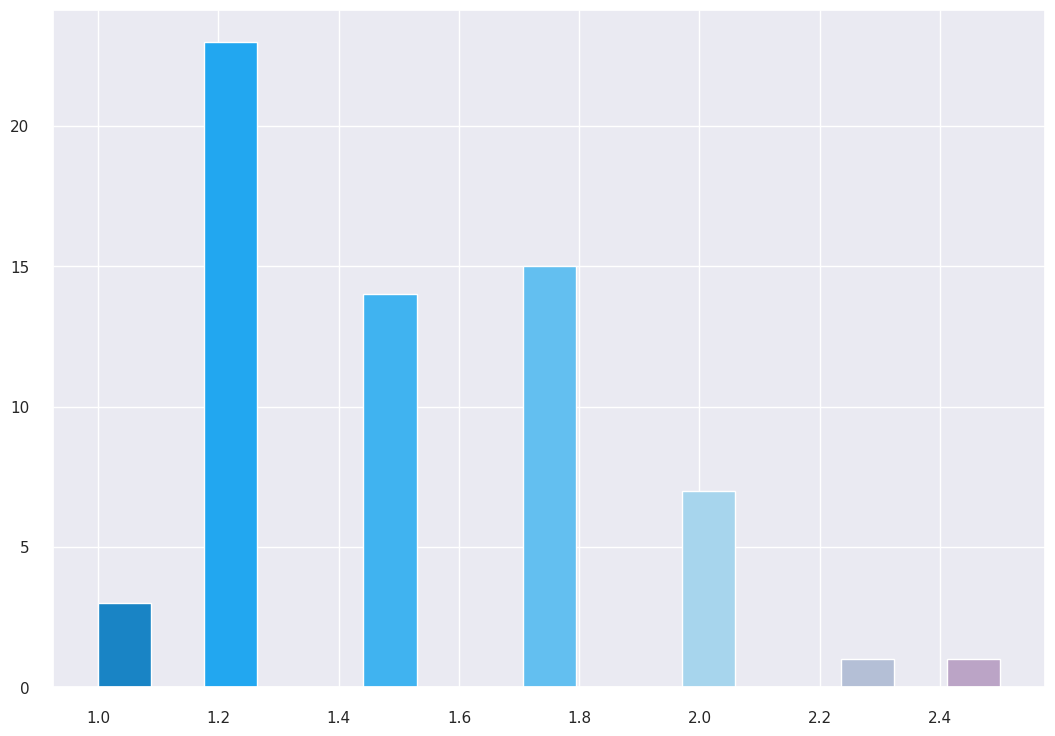

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


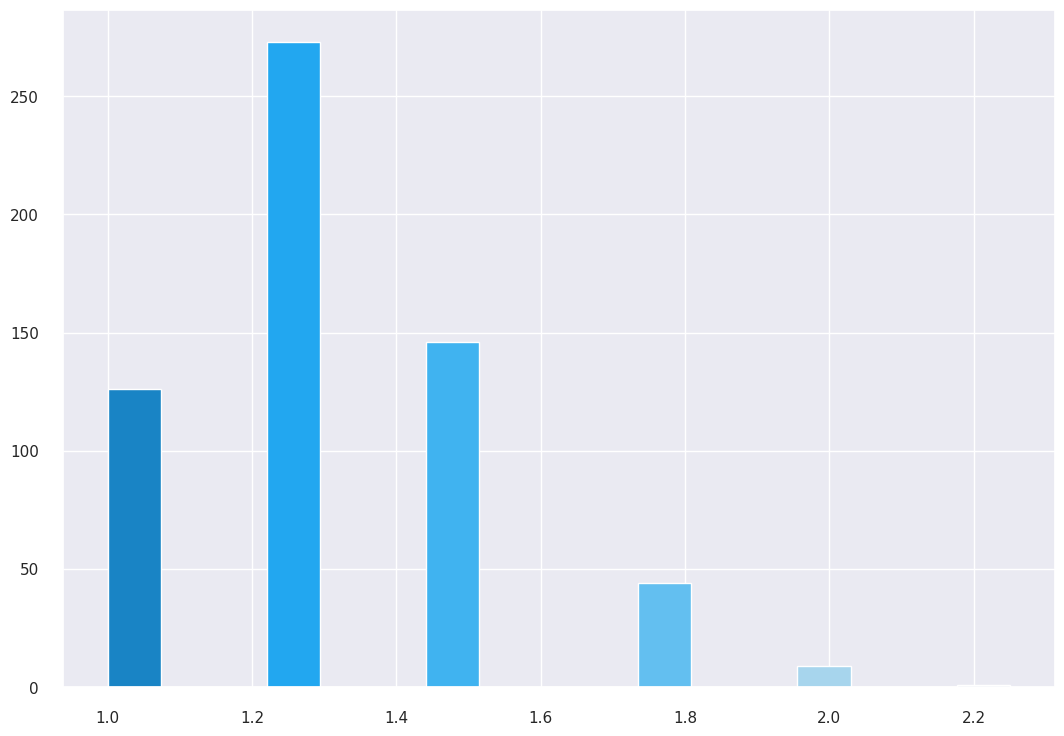

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


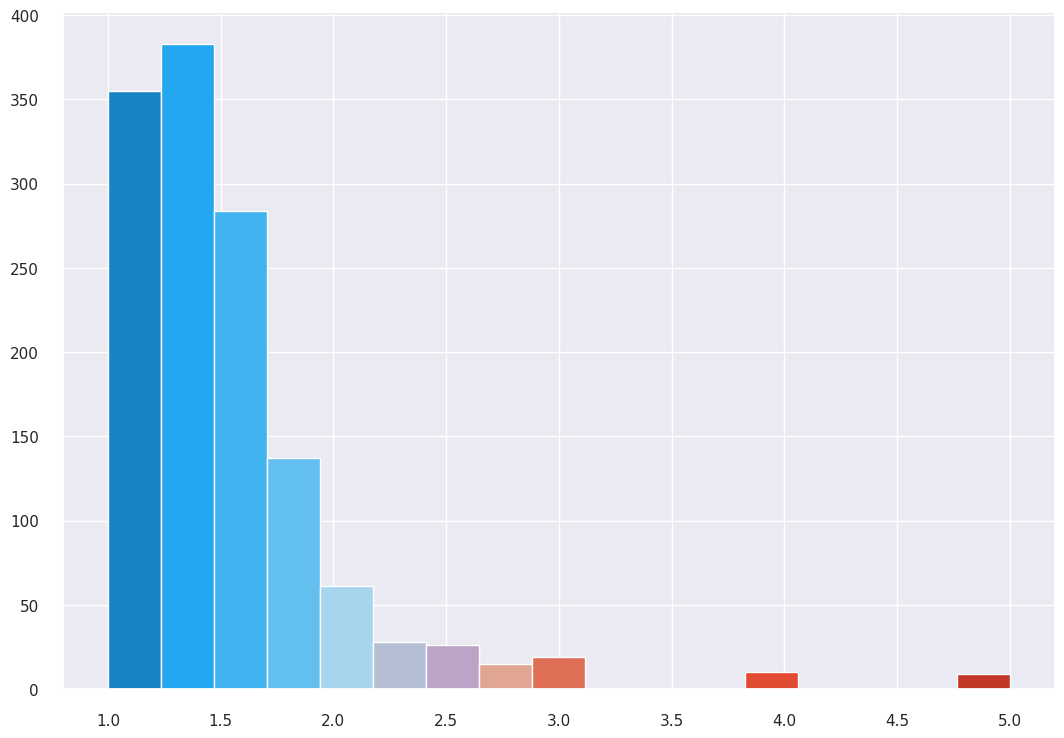

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


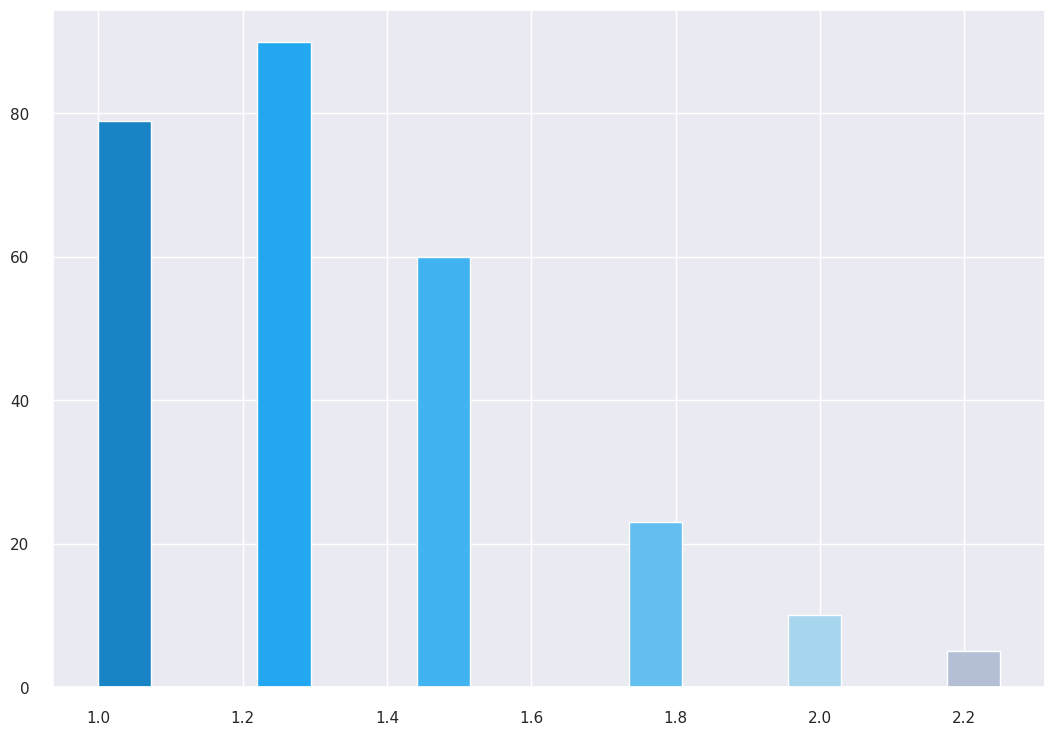

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


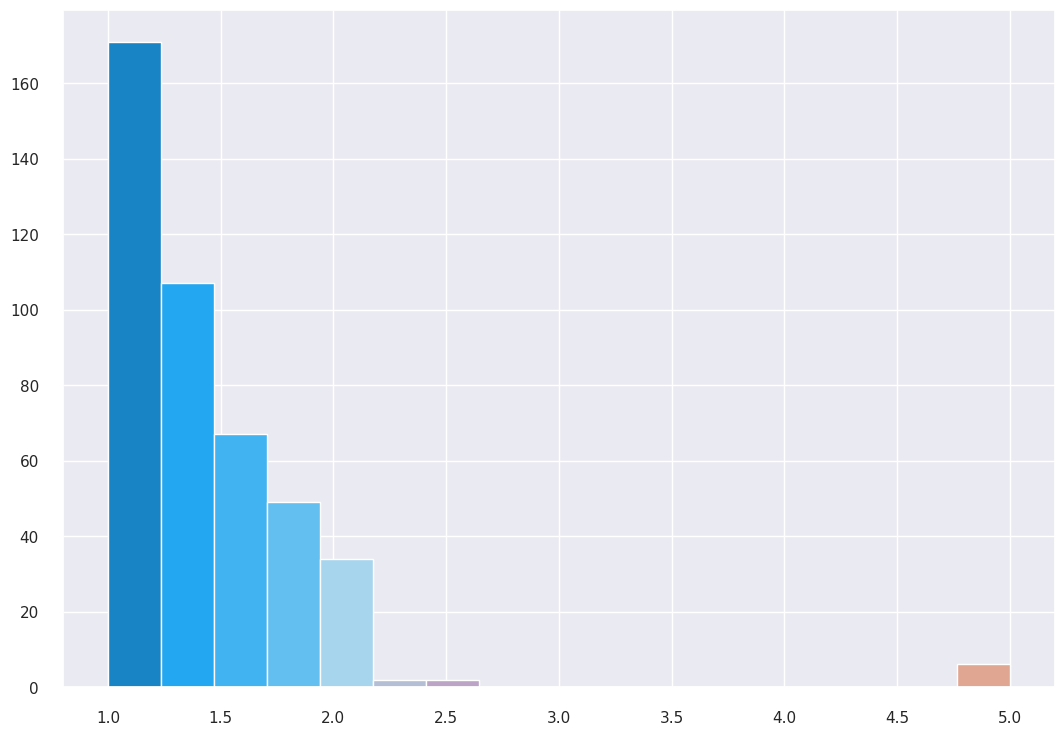

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


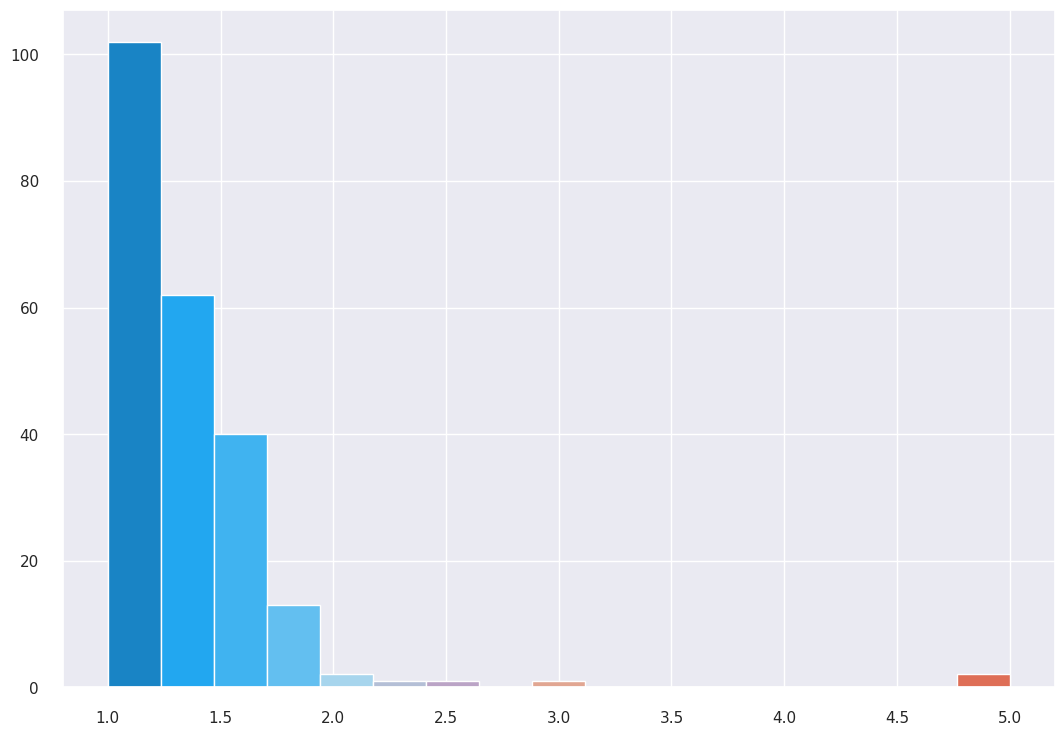

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


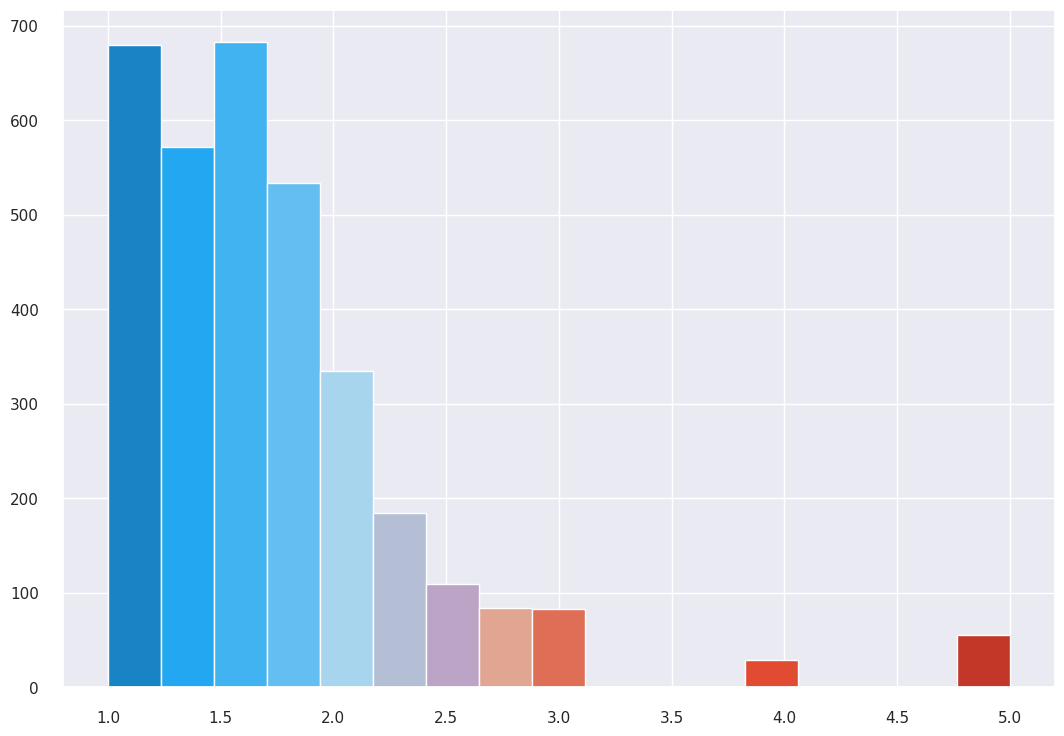

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


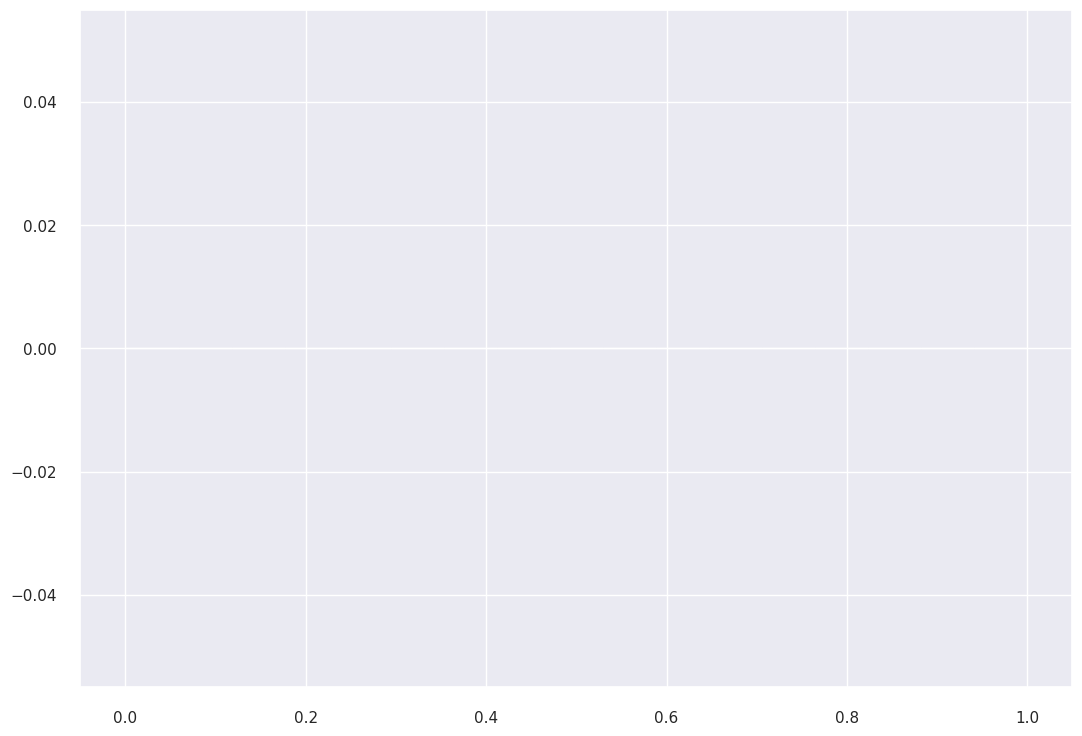

  2022 First Semester                                      \
                 mean median mode       std   count  skew   
0            1.667228    1.5  1.0  0.852438  103785  2.34   

  2022 Second Semester                                    2023 First Semester  \
                  mean median mode      std   count  skew                mean   
0             1.667185    1.5  1.0  0.83245  202284  2.32            1.562215   

                                      
  median mode       std   count skew  
0   1.25  1.0  0.782063  249609  2.6  


In [ ]:
# Plot Each College Data
csv_data = {}
for college in offering_college:
  college_data = data[data['offering_college'] == college]
  sorted_data = college_data[college_data['semester'] == '2023 First Semester']

  # Calculate grade counts for the current semester
  grade_counts = sorted_data.groupby('grade').size()
  fig = plt.hist(grade_counts.index, weights=grade_counts.values, bins=17)
  color_index = 0
  for i, bar in enumerate(fig[2]):
      if fig[0][i] > 0:
          bar.set_facecolor(palette[color_index % len(palette)])
          color_index += 1

  csv_data[college] = grade_counts
  df = pd.DataFrame(csv_data)

  plt.show()
  statdf = pd.DataFrame(statistics)
  print(statdf)

df.to_csv('grade_distribution.csv', index=False)

